### **Productivity Prediction of Garment Industry Employees**

#### **Objectives**
1. Create a model that can predict the level of productivity of employee teams in the garment industry.

#### **Data source and column explanations**
Column definitions:

1. date : Date in MM-DD-YYYY
2. day : Day of the Week
3. quarter : A portion of the month. A month was divided into four quarters
4. department : Associated department with the instance
5. team_no : Associated team number with the instance
6. no_of_workers : Number of workers in each team
7. no_of_style_change : Number of changes in the style of a particular product
8. targeted_productivity : Targeted productivity set by the Authority for each team for each day.
9. smv : Standard Minute Value, it is the allocated time for a task
10. wip : Work in progress. Includes the number of unfinished items for products
11. over_time : Represents the amount of overtime by each team in minutes
12. incentive : Represents the amount of financial incentive (in BDT/ Bangladeshi Taka) that enables or motivates a particular course of action.
13. idle_time : The amount of time when the production was interrupted due to several reasons
14. idle_men : The number of workers who were idle due to production interruption
15. actual_productivity : The actual % of productivity that was delivered by the workers.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [ ]:
garment = pd.read_csv(r'/content/drive/MyDrive/Final Year Research/data/garments_worker_productivity.csv')
garment.head(10)
garment.head(5)

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
# checking the shape of the dataset
garment.shape

(1197, 15)

In [ ]:
#Checking datatypes, null counts
garment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

### 3. EDA and Data Cleaning

In [ ]:
#renaming ambiguous columns
# garment = garment.rename(columns={'wip': 'work_in_progress', 'smv':'std_minute_value'})

In [ ]:
# separating variables for ease of analysis to those that can
# be considered numerical and categorical
categorical = ['date',"quarter", "department", "day", "team", 'no_of_style_change']
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

In [ ]:
#checking for anomalies for the categoraical data columns

for col in categorical:
  print(col)
  print(garment[col].unique())
  print('\n')

date
['1/1/2015' '1/3/2015' '1/4/2015' '1/5/2015' '1/6/2015' '1/7/2015'
 '1/8/2015' '1/10/2015' '1/11/2015' '1/12/2015' '1/13/2015' '1/14/2015'
 '1/15/2015' '1/17/2015' '1/18/2015' '1/19/2015' '1/20/2015' '1/21/2015'
 '1/22/2015' '1/24/2015' '1/25/2015' '1/26/2015' '1/27/2015' '1/28/2015'
 '1/29/2015' '1/31/2015' '2/1/2015' '2/2/2015' '2/3/2015' '2/4/2015'
 '2/5/2015' '2/7/2015' '2/8/2015' '2/9/2015' '2/10/2015' '2/11/2015'
 '2/12/2015' '2/14/2015' '2/15/2015' '2/16/2015' '2/17/2015' '2/18/2015'
 '2/19/2015' '2/22/2015' '2/23/2015' '2/24/2015' '2/25/2015' '2/26/2015'
 '2/28/2015' '3/1/2015' '3/2/2015' '3/3/2015' '3/4/2015' '3/5/2015'
 '3/7/2015' '3/8/2015' '3/9/2015' '3/10/2015' '3/11/2015']


quarter
['Quarter1' 'Quarter2' 'Quarter3' 'Quarter4' 'Quarter5']


department
['sweing' 'finishing ' 'finishing']


day
['Thursday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday']


team
[ 8  1 11 12  6  7  2  3  9 10  5  4]


no_of_style_change
[0 1 2]




Insights
- A month was divided into 4 quarters. However, there is a 'Quarter5' value observed. (This happened )
- Also, under department spelling of sewing is wrong and finishing appears as a unique value twice due to whitespace.
- Need to change the team based on the departments
- There is no friday in the day column

In [ ]:
#checking for missing values
garment.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


In [ ]:
#checking skewness
garment[numerical].skew()

,0
targeted_productivity,-2.144150
smv,0.405937
wip,9.741786
over_time,0.673287
incentive,15.790746
idle_time,20.545425
idle_men,9.855079
no_of_workers,-0.111740
actual_productivity,-0.807492


Colmuns having highly skewd distritions (-1 > skew > 1):
- targeted_productivity (negative)
- work_in_progress (positive)
- idle_men (positve)
- incentive (positive)
- idle_time (positive)

Colmuns having Moderately skewd distritions (-1 < skew < -1/2 or 1/2 < skew < 1):
- over_time (positive)
- actual_productivity (negative)

Colmuns which are approximately symmetric distritions (-1/2 < skew < 1/2):
- std_minute_value
- no_of_workers

In [ ]:
print("median: ",garment['wip'].median())
print("mean: ",garment['wip'].mean())

median:  1039.0
mean:  1190.4659913169319


In [ ]:
garment = garment.replace(['finishing '], ['finishing'])
garment = garment.replace(['sweing'], ['sewing'])
garment.department.value_counts()

,count
department,
sewing,691
finishing,506


In [ ]:
# checking the null values with the department types
print("Number of null values in the sewing department wip: ", garment[garment['department'] == 'sewing'].wip.isnull().sum())
print("Number of null values in the finishing department wip: ", garment[garment['department'] == 'finishing'].wip.isnull().sum())

Number of null values in the sewing department wip:  0
Number of null values in the finishing department wip:  506


In [ ]:
garment['wip'].fillna(0 ,inplace=True)

In [ ]:
#to deal with the anomalies above, the figures will be truncated
garment['no_of_workers'] = garment['no_of_workers'].apply(lambda x: int(x))

In [ ]:
#date column to datetime
garment['date'] = pd.to_datetime(garment['date'])

In [ ]:
garment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team                   1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    1197 non-null   float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

In [ ]:
import datetime
garment_year = garment['date'].dt.strftime('%Y')
garment_month = garment['date'].dt.strftime('%m')

In [ ]:
garment.insert(1, 'year', garment_year.astype(str))

In [ ]:
garment.insert(2, 'month', garment_month.astype(str))

In [ ]:
garment.head(5)

,date,year,month,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,2015,01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,2015-01-01,2015,01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500
2,2015-01-01,2015,01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,2015-01-01,2015,01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,2015-01-01,2015,01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382


In [ ]:
garment['month'].value_counts()

,count
month,
01,542
02,443
03,212


In [ ]:
garment.columns

Index(['date', 'year', 'month', 'quarter', 'department', 'day', 'team',
       'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

In [ ]:
garment_trainer = garment.drop(['date', 'year'], axis = 1)

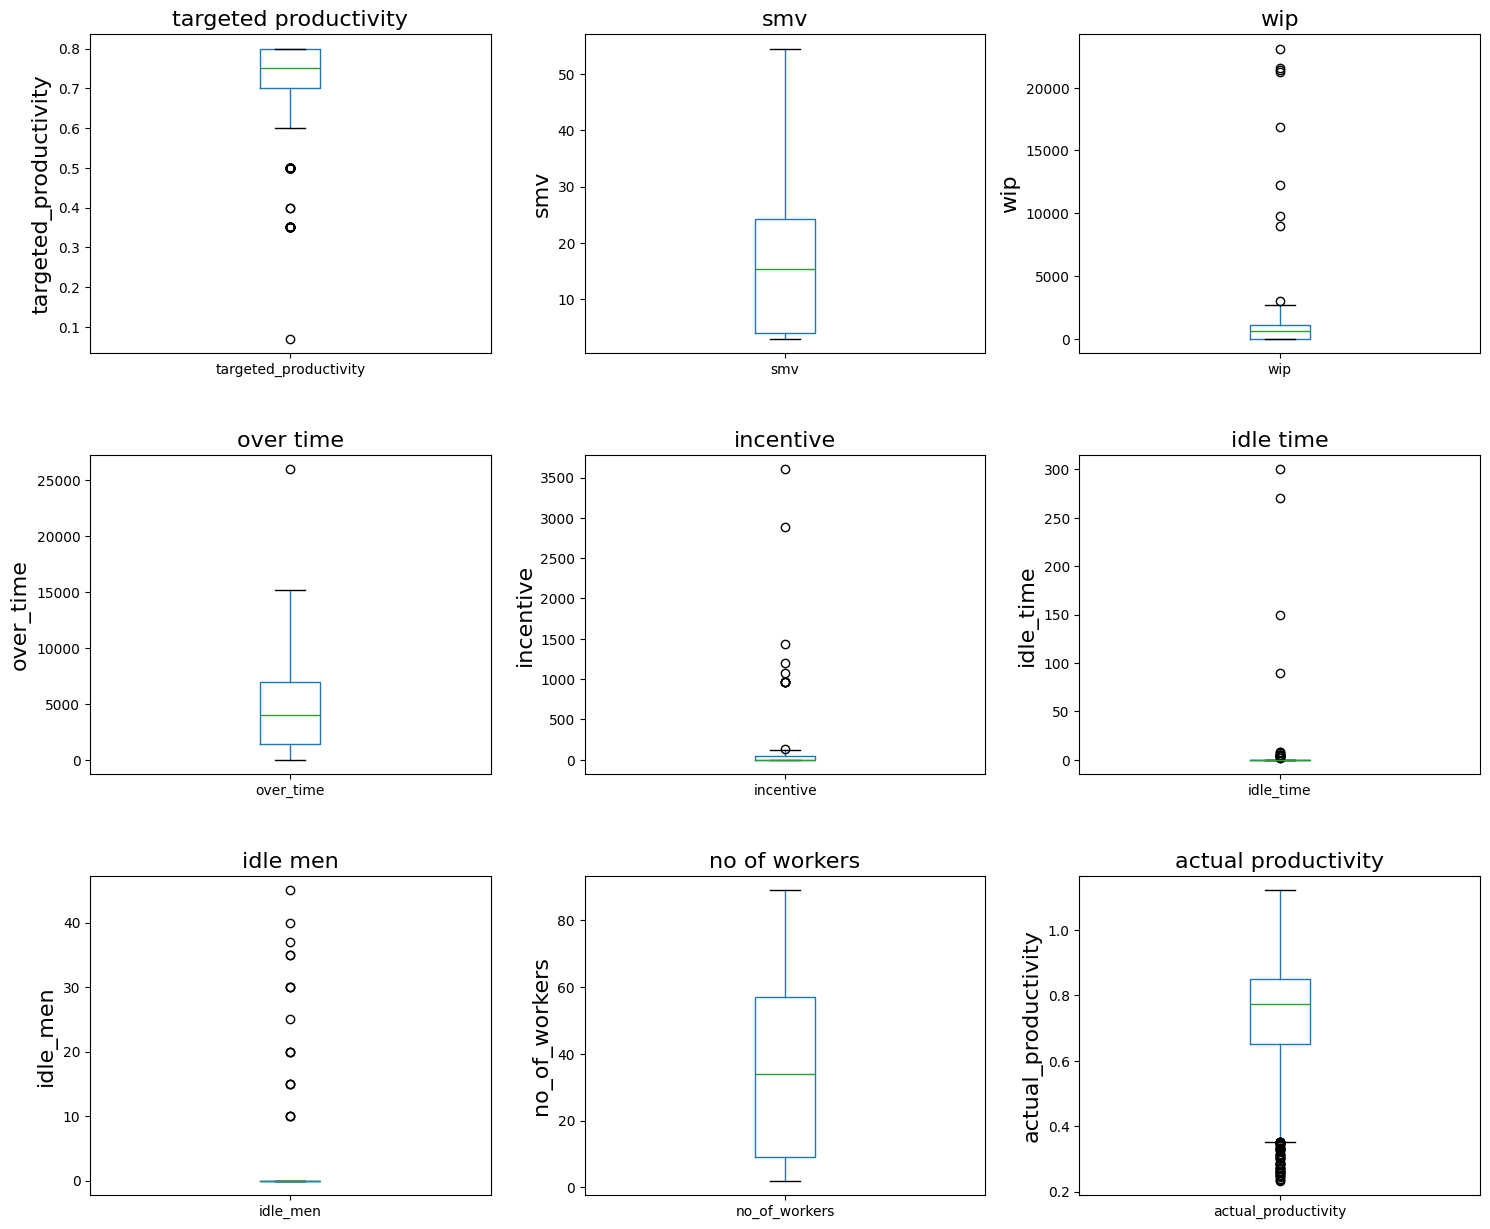

In [ ]:
# Checking for outliers in continuous data

#function to remove _ from titles

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  garment_trainer.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}", fontsize = 16)
  ax.set_ylabel(numerical[i], fontsize = 16)


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

- Outlier of the targeted_productivity might be a recoring error since most of the targeted productivities are around 0.7. So that it can be changed in to 0.7
- Outlier in the overtime is practical ((25920 / 60) / 54 = 8) Each employee can work 8 hours overtime
- Cannot determine anything about the actual_productivity, idle_time, incentive and idle_men since they cannot be determine properly as an error or an actual value
- Actual_produtivity can go beyond 1 as well

In [ ]:
garment[garment['over_time'] > 15000]

,date,year,month,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
138,2015-01-08,2015,01,Quarter2,sewing,Thursday,12,0.80,11.61,548.0,15120,63,0.0,0,0,31,0.800107
146,2015-01-08,2015,01,Quarter2,sewing,Thursday,11,0.35,12.52,287.0,25920,38,0.0,0,0,54,0.349951


In [ ]:
garment_trainer[garment_trainer['no_of_workers'] > 60]

,month,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
355,01,Quarter3,sewing,Wednesday,6,0.8,11.61,916.0,5760,75,0.0,0,0,89,0.850411


In [ ]:
garment_trainer.loc[(garment_trainer['department'] == 'sewing') & (garment_trainer['team'] == 6)].no_of_workers.mean()

34.66101694915254

In [ ]:
garment_trainer.loc[garment_trainer['targeted_productivity'] == 0.07, 'targeted_productivity'] = 0.7
garment_trainer.loc[garment_trainer['no_of_workers'] == 89, 'no_of_workers'] = 35
# change the values of actucal productivity > 1 as 1
garment_trainer['actual_productivity'] = np.where(garment_trainer['actual_productivity'] >= 1, 1, garment_trainer['actual_productivity'])


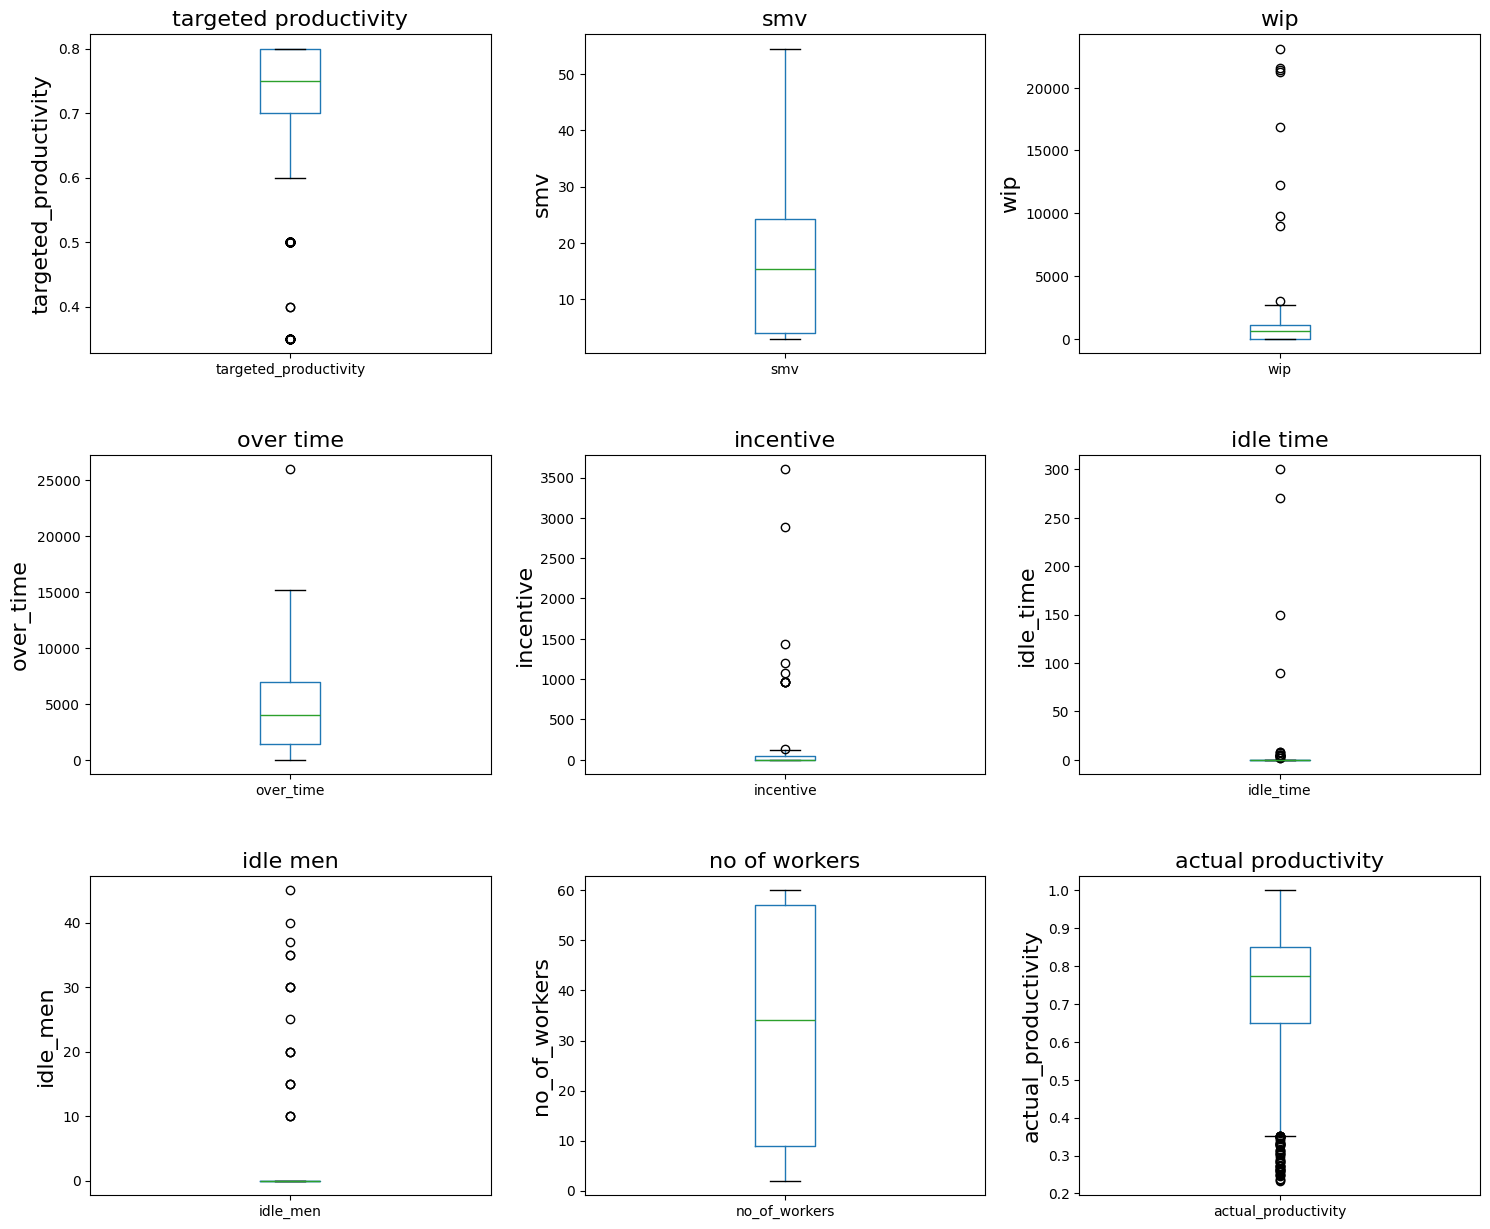

In [ ]:
# Checking for outliers in continuous data

#function to remove _ from titles

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  garment_trainer.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}", fontsize=16)
  ax.set_ylabel(numerical[i], fontsize=16)


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

In [ ]:
garment_trainer[garment_trainer['wip'] > 15000]

,month,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
561,02,Quarter1,sewing,Monday,1,0.8,22.94,16882.0,7020,113,0.0,0,0,58,1.000000
563,02,Quarter1,sewing,Monday,2,0.8,22.52,21385.0,7020,88,0.0,0,0,58,0.900158
564,02,Quarter1,sewing,Monday,3,0.8,22.52,21266.0,6840,70,0.0,0,0,57,0.900142
565,02,Quarter1,sewing,Monday,10,0.8,22.52,21540.0,6720,88,0.0,0,0,56,0.900130
569,02,Quarter1,sewing,Monday,4,0.8,22.52,23122.0,5940,50,0.0,0,0,56,0.800393


There were outliers in targeted productivity, overtime, work in progress, incentive, idle time, idle men, and actual productivity columns. They will not be dropped as they are likely due to natural variability in the workflow of different teams, where some teams perform significantly above or below average in terms of time, pending work, and productivity. Also, the performance of a particular team can vary on different days, with some days being significantly above or below average.

### **EDA Process**

#### **Univariate Analysis**

#### **For numerical features**

In [ ]:
#statistical summaries of various numerical variables
garment_trainer[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
targeted_productivity,1197.0,0.730159,0.096017,0.350000,0.700000,0.750000,0.800000,0.80
smv,1197.0,15.062172,10.943219,2.900000,3.940000,15.260000,24.260000,54.56
wip,1197.0,687.228070,1514.582341,0.000000,0.000000,586.000000,1083.000000,23122.00
over_time,1197.0,4567.460317,3348.823563,0.000000,1440.000000,3960.000000,6960.000000,25920.00
incentive,1197.0,38.210526,160.182643,0.000000,0.000000,0.000000,50.000000,3600.00
idle_time,1197.0,0.730159,12.709757,0.000000,0.000000,0.000000,0.000000,300.00
idle_men,1197.0,0.369256,3.268987,0.000000,0.000000,0.000000,0.000000,45.00
no_of_workers,1197.0,34.506266,22.096497,2.000000,9.000000,34.000000,57.000000,60.00
actual_productivity,1197.0,0.734461,0.173380,0.233705,0.650307,0.773333,0.850253,1.00


In [ ]:
# prompt: code to round these garment_trainer[numerical].describe().T to two decimal points

# Rounding numerical features to two decimal places
rounded_description = garment[numerical].describe().round(2).T
rounded_description

,count,mean,std,min,25%,50%,75%,max
targeted_productivity,1197.0,0.73,0.10,0.07,0.70,0.75,0.80,0.80
smv,1197.0,15.06,10.94,2.90,3.94,15.26,24.26,54.56
wip,1197.0,687.23,1514.58,0.00,0.00,586.00,1083.00,23122.00
over_time,1197.0,4567.46,3348.82,0.00,1440.00,3960.00,6960.00,25920.00
incentive,1197.0,38.21,160.18,0.00,0.00,0.00,50.00,3600.00
idle_time,1197.0,0.73,12.71,0.00,0.00,0.00,0.00,300.00
idle_men,1197.0,0.37,3.27,0.00,0.00,0.00,0.00,45.00
no_of_workers,1197.0,34.55,22.15,2.00,9.00,34.00,57.00,89.00
actual_productivity,1197.0,0.74,0.17,0.23,0.65,0.77,0.85,1.12


Histograms of numerical variables

In [ ]:
garment_trainer.columns

Index(['month', 'quarter', 'department', 'day', 'team',
       'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

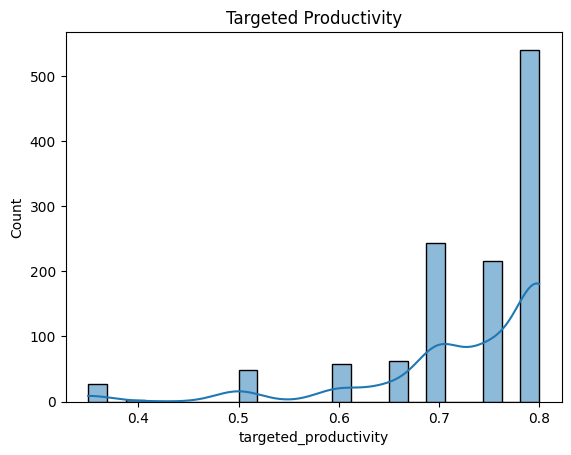

In [ ]:
ax = sns.histplot(garment_trainer.targeted_productivity, kde = True)
ax.set_title("Targeted Productivity")
plt.show()

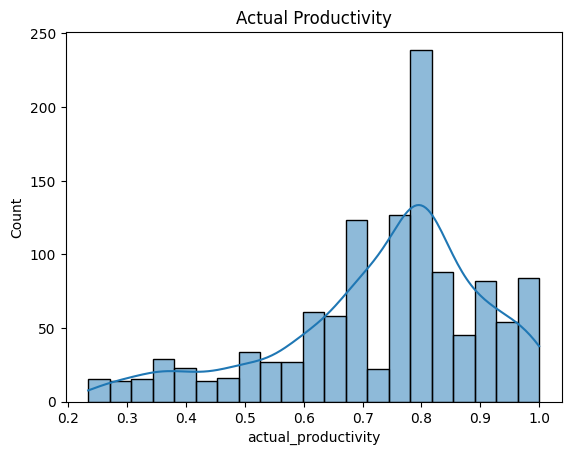

In [ ]:
ax = sns.histplot(garment_trainer.actual_productivity, kde = True)
ax.set_title("Actual Productivity")
plt.show()

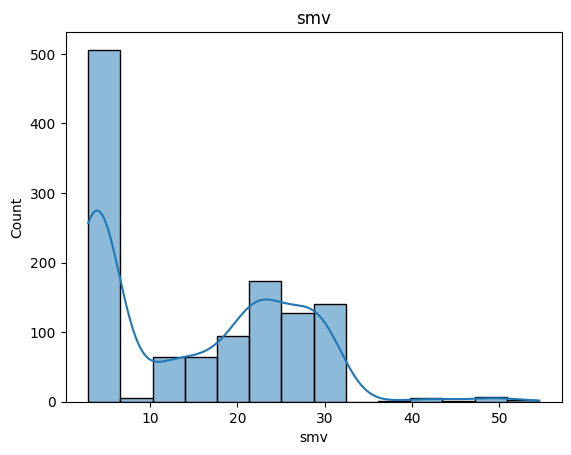

In [ ]:
ax = sns.histplot(garment_trainer.smv, kde = True)
ax.set_title("smv")
plt.show()

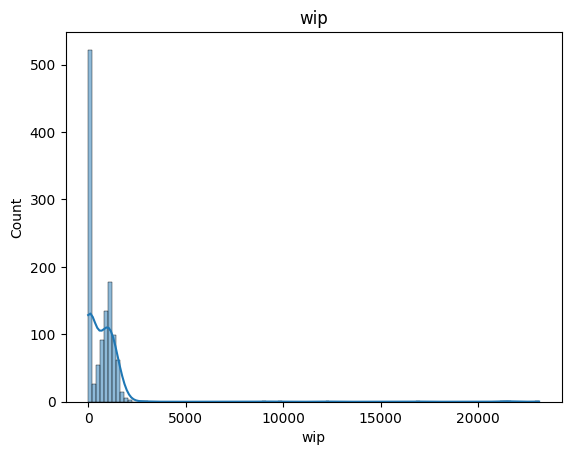

In [ ]:
ax = sns.histplot(garment_trainer.wip, kde = True)
ax.set_title("wip")
plt.show()

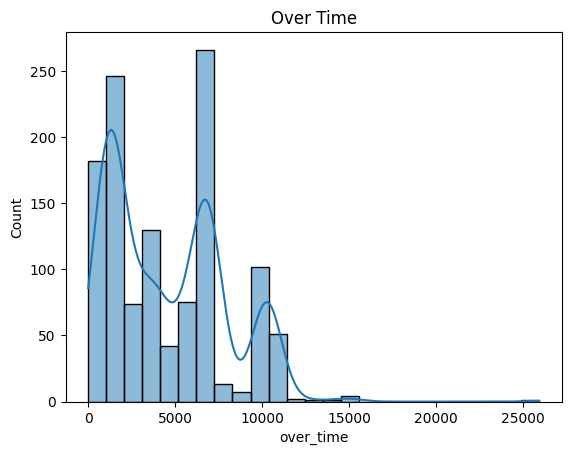

In [ ]:
ax = sns.histplot(garment_trainer.over_time, kde = True)
ax.set_title("Over Time")
plt.show()

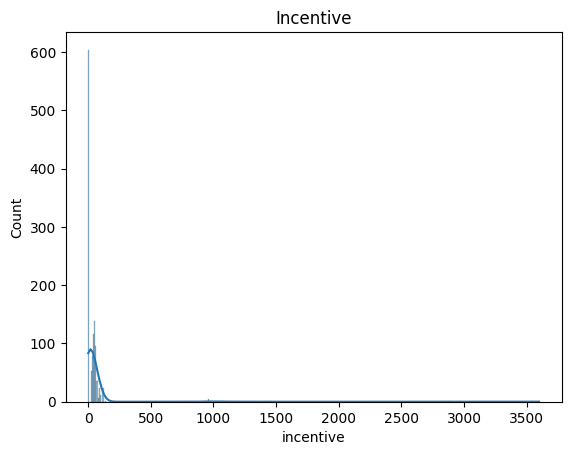

In [ ]:
ax = sns.histplot(garment_trainer.incentive, kde = True)
ax.set_title("Incentive")
plt.show()

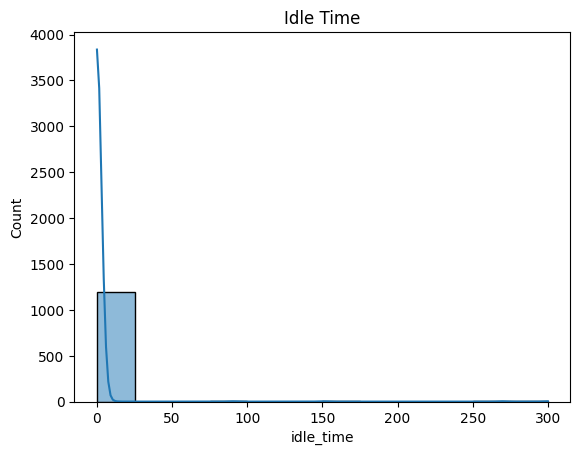

In [ ]:
ax = sns.histplot(garment_trainer.idle_time, kde = True)
ax.set_title("Idle Time")
plt.show()

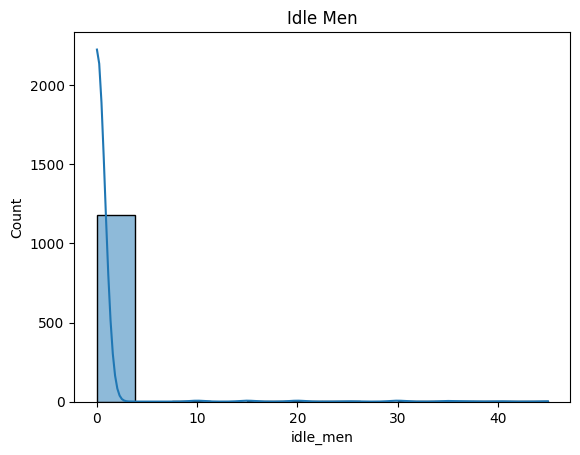

In [ ]:
ax = sns.histplot(garment_trainer.idle_men, kde = True)
ax.set_title("Idle Men")
plt.show()

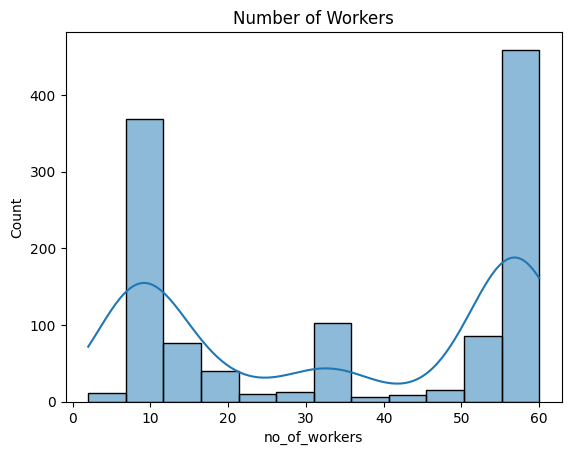

In [ ]:
ax = sns.histplot(garment_trainer.no_of_workers, kde = True)
ax.set_title("Number of Workers")
plt.show()

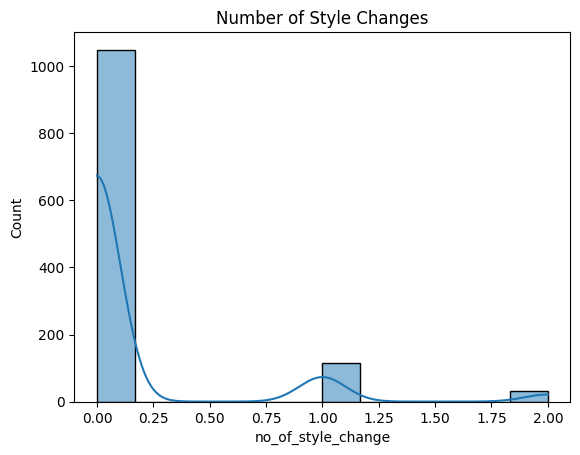

In [ ]:
ax = sns.histplot(garment_trainer.no_of_style_change, kde = True)
ax.set_title("Number of Style Changes")
plt.show()

In [ ]:
numerical

['targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_workers',
 'actual_productivity']

In [ ]:
# zero count in the numerical features

zero_count = [len(garment_trainer[garment_trainer['targeted_productivity'] == 0]),
              len(garment_trainer[garment_trainer['smv'] == 0]),
              len(garment_trainer[garment_trainer['wip'] == 0]),
              len(garment_trainer[garment_trainer['over_time'] == 0]),
              len(garment_trainer[garment_trainer['incentive'] == 0]),
              len(garment_trainer[garment_trainer['idle_time'] == 0]),
              len(garment_trainer[garment_trainer['idle_men'] == 0]),
              len(garment_trainer[garment_trainer['no_of_workers'] == 0]),
              len(garment_trainer[garment_trainer['actual_productivity'] == 0])]

dict = {"numerical_feature": numerical, "zero_count": zero_count}
zero_count_dataset = pd.DataFrame(dict)

zero_count_dataset['zero_percentatge'] = zero_count_dataset['zero_count'] / len(garment) * 100
zero_count_dataset

,numerical_feature,zero_count,zero_percentatge
0,targeted_productivity,0,0.000000
1,smv,0,0.000000
2,wip,506,42.272348
3,over_time,31,2.589808
4,incentive,604,50.459482
5,idle_time,1179,98.496241
6,idle_men,1179,98.496241
7,no_of_workers,0,0.000000
8,actual_productivity,0,0.000000


In [ ]:
# pd.options.display.float_format(None)
from scipy.stats import shapiro
from scipy.stats import kstest

y = np.empty(9, dtype=object)

# calculate the shapiro test p value
for i in range(0, 9):
    y[i] = shapiro(garment[numerical[i]])[1]

result = {'Numerical Feature': numerical, 'Shapiro Result p-value': y}
pd.DataFrame(result)

# print(kstest(garment['actual_productivity'], 'norm'))

,Numerical Feature,Shapiro Result p-value
0,targeted_productivity,0.0
1,smv,0.0
2,wip,0.0
3,over_time,0.0
4,incentive,0.0
5,idle_time,0.0
6,idle_men,0.0
7,no_of_workers,0.0
8,actual_productivity,0.0


In [ ]:
y

array([9.096996754912042e-41, 1.5818186979900694e-31,
       2.8669179563321166e-55, 9.320972695709268e-27,
       1.6122624307524022e-58, 8.131311232290709e-61,
       1.0482499424867543e-59, 2.537381167749603e-37,
       6.871260611096058e-21], dtype=object)

- Since all the p-value are less than .05, we reject the null hypothesis of the Shapiro-Wilk test.
- This means we have sufficient evidence to say that the sample data does not come from a normal distribution

#### For categorical features

In [ ]:
garment_trainer.head()

,month,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.940725
1,01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886500
2,01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
3,01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.800570
4,01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800382


In [ ]:
# create a new feature as department_team_no for analys the teams according to the department
garment_trainer.insert(4, 'department_team', garment_trainer['department'].astype(str) + '_' + garment_trainer['team'].astype(str))

(-1.25, 1.25, -1.25, 1.25)

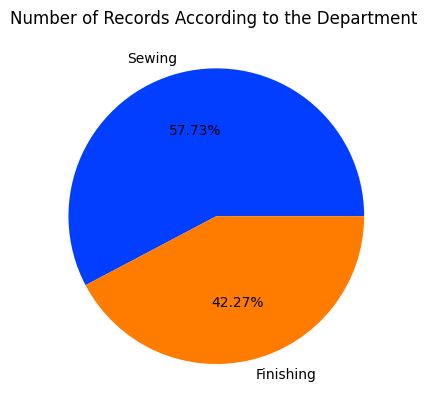

In [ ]:
size = garment_trainer.department.value_counts()
labels = 'Sewing', 'Finishing'
explode = [0, 0]

plt.pie(size, colors = sns.color_palette('bright'),labels = labels,autopct = '%.2f%%', explode=explode)
plt.title('Number of Records According to the Department ', fontsize = 12)
plt.axis('off')

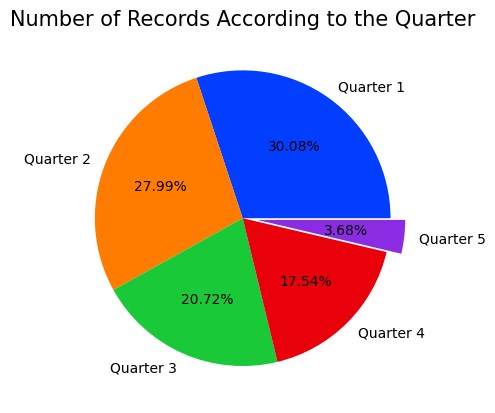

In [ ]:
size = garment_trainer.quarter.value_counts()
labels = ['Quarter 1', 'Quarter 2', 'Quarter 3', 'Quarter 4', 'Quarter 5']
explode = [0, 0, 0, 0, 0.1]

plt.pie(size, colors = sns.color_palette('bright'),labels = labels,autopct = '%.2f%%', explode=explode)
plt.title('Number of Records According to the Quarter', fontsize = 15)
plt.axis('off')
plt.show()

- Since Quarter 5 contains only smal numebr of values we can add them into Quarter 4

In [ ]:
garment_trainer.day.value_counts()

,count
day,
Wednesday,208
Sunday,203
Tuesday,201
Thursday,199
Monday,199
Saturday,187


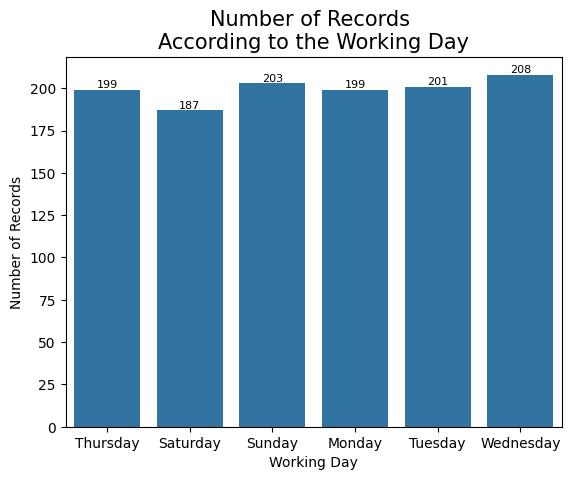

In [ ]:
ax = sns.countplot(data = garment_trainer, x = 'day')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('Number of Records \nAccording to the Working Day', fontsize = 15)
plt.ylabel('Number of Records')
plt.xlabel('Working Day')
plt.show()

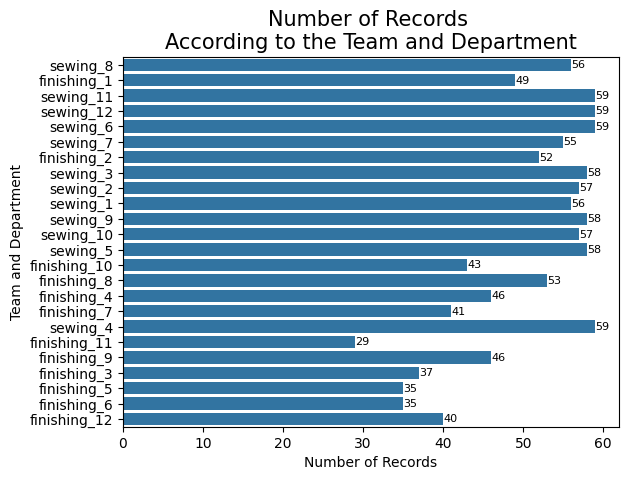

In [ ]:
ax = sns.countplot(data = garment_trainer, y = 'department_team')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('Number of Records \nAccording to the Team and Department', fontsize = 15)
plt.ylabel('Team and Department')
plt.xlabel('Number of Records')
plt.show()

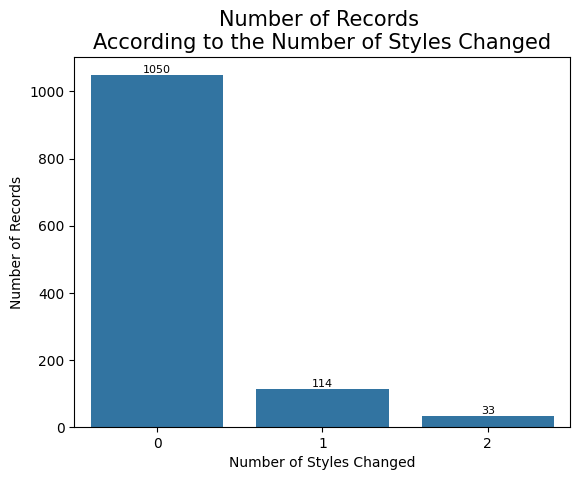

In [ ]:
ax = sns.countplot(data = garment_trainer, x = 'no_of_style_change')
ax.bar_label(ax.containers[0], fontsize=8)
plt.title('Number of Records \nAccording to the Number of Styles Changed', fontsize = 15)
plt.ylabel('Number of Records')
plt.xlabel('Number of Styles Changed')
plt.show()

Observations:
* Quarter one had the most records in the dataset
* There were more records related to the sewing department than the finishing department
* The day of the week with the most records is Wednesday
* For most records, the number of changes in the style of a particular product was 0

In [ ]:
categorical

['date', 'quarter', 'department', 'day', 'team', 'no_of_style_change']

### **Bivariate Analysis**

Targeted Productivity and Actual Productivity

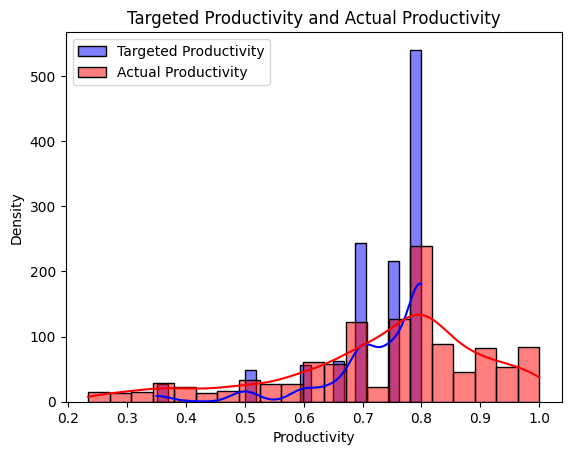

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# ax = sns.distplot(garment.targeted_productivity)
# ax.set_title("Targeted Productivity and Actual Productivity")

sns.histplot(garment_trainer.targeted_productivity, color='blue', alpha=0.5, kde=True, label='Targeted Productivity')
sns.histplot(garment_trainer.actual_productivity, color='red', alpha=0.5, kde=True, label='Actual Productivity')

# Adding labels and legend
plt.xlabel('Productivity')
plt.title('Targeted Productivity and Actual Productivity')
plt.ylabel('Density')
plt.legend()

plt.show()

Actual Productivity by day of week, department, Quarter of the month, team

In [ ]:
garment_trainer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   department_team        1197 non-null   object 
 5   team                   1197 non-null   int64  
 6   targeted_productivity  1197 non-null   float64
 7   smv                    1197 non-null   float64
 8   wip                    1197 non-null   float64
 9   over_time              1197 non-null   int64  
 10  incentive              1197 non-null   int64  
 11  idle_time              1197 non-null   float64
 12  idle_men               1197 non-null   int64  
 13  no_of_style_change     1197 non-null   int64  
 14  no_of_workers          1197 non-null   int64  
 15  actu

In [ ]:
garment_trainer['team'] = garment_trainer['team'].astype(str)

In [ ]:
garment_trainer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   department_team        1197 non-null   object 
 5   team                   1197 non-null   object 
 6   targeted_productivity  1197 non-null   float64
 7   smv                    1197 non-null   float64
 8   wip                    1197 non-null   float64
 9   over_time              1197 non-null   int64  
 10  incentive              1197 non-null   int64  
 11  idle_time              1197 non-null   float64
 12  idle_men               1197 non-null   int64  
 13  no_of_style_change     1197 non-null   int64  
 14  no_of_workers          1197 non-null   int64  
 15  actu

In [ ]:
categorical = ["quarter", "department", "day", "department_team", "no_of_style_change", "month"]

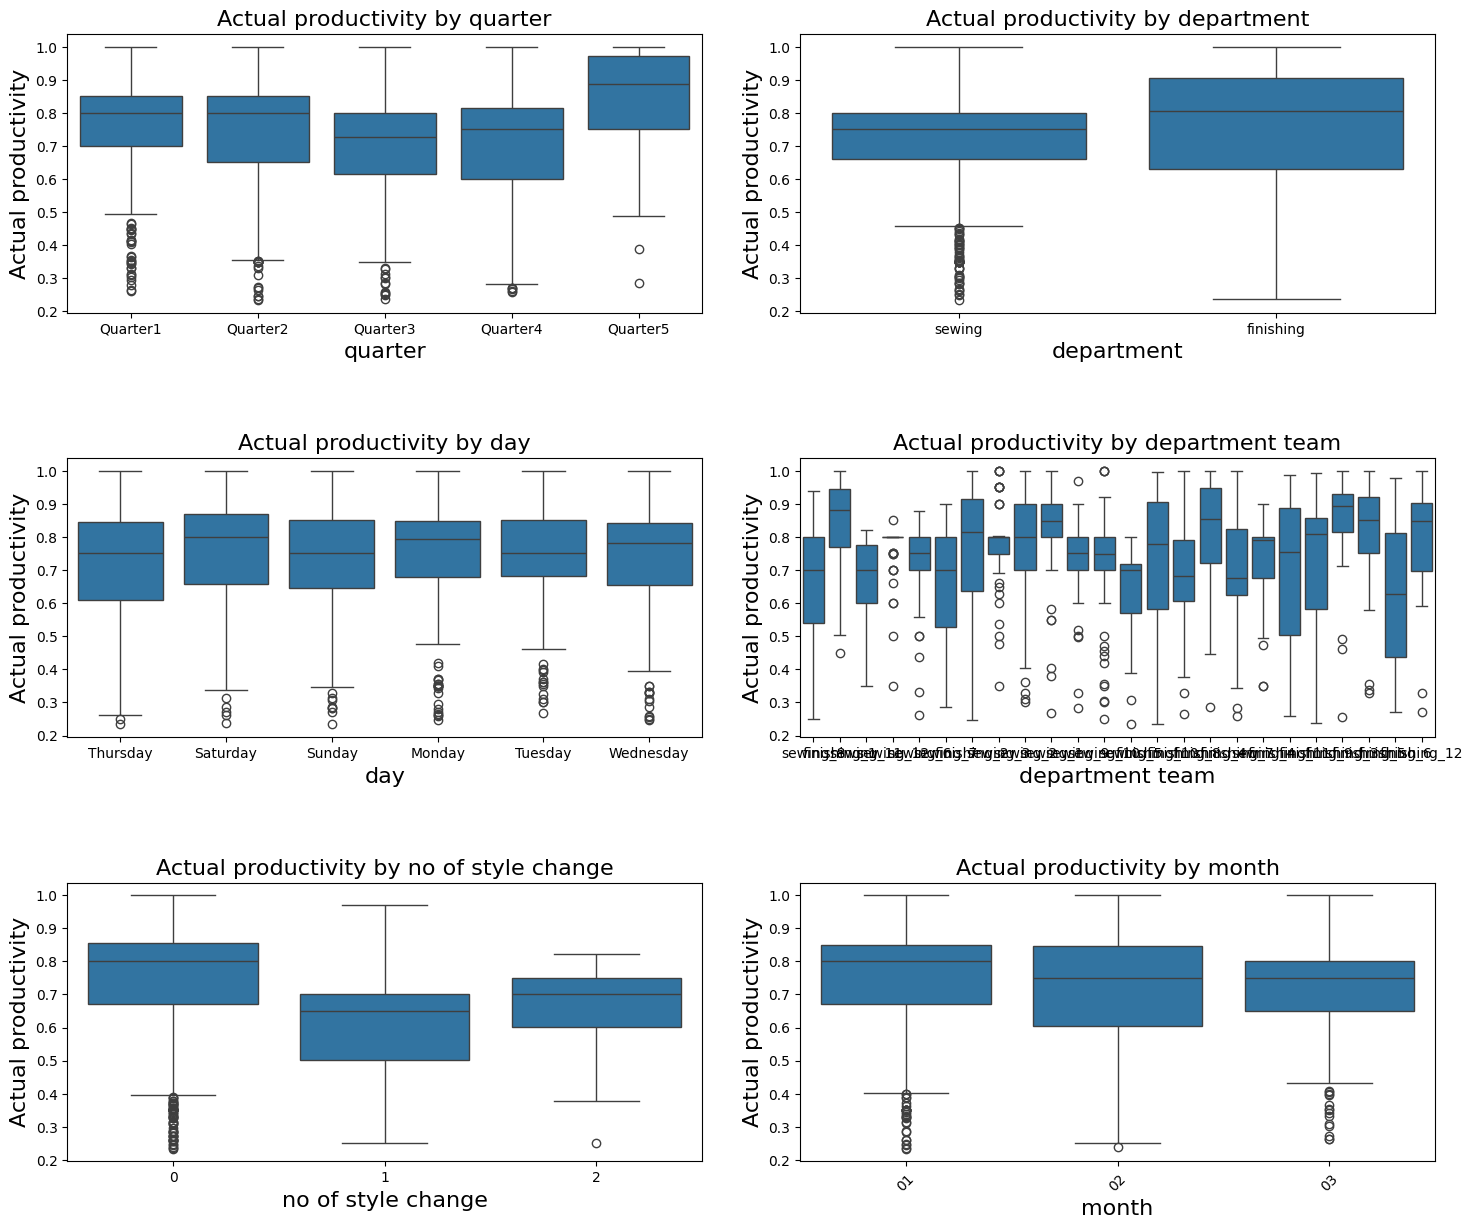

In [ ]:
fig,axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12,8))

for i, ax in enumerate(axes.ravel()):
  # if i <= 2:
    sns.boxplot(data = garment_trainer, x = categorical[i], y = 'actual_productivity', ax = ax)
    ax.set_title(f"Actual productivity by {title(categorical[i])}",fontsize=16)
    ax.set_xlabel(title(categorical[i]),  fontsize=16)
    plt.xticks(rotation=45)
    ax.set_ylabel("Actual productivity" , fontsize=16)

fig.tight_layout()
plt.subplots_adjust(top=1.5,right=1.2)
plt.show()

# ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels

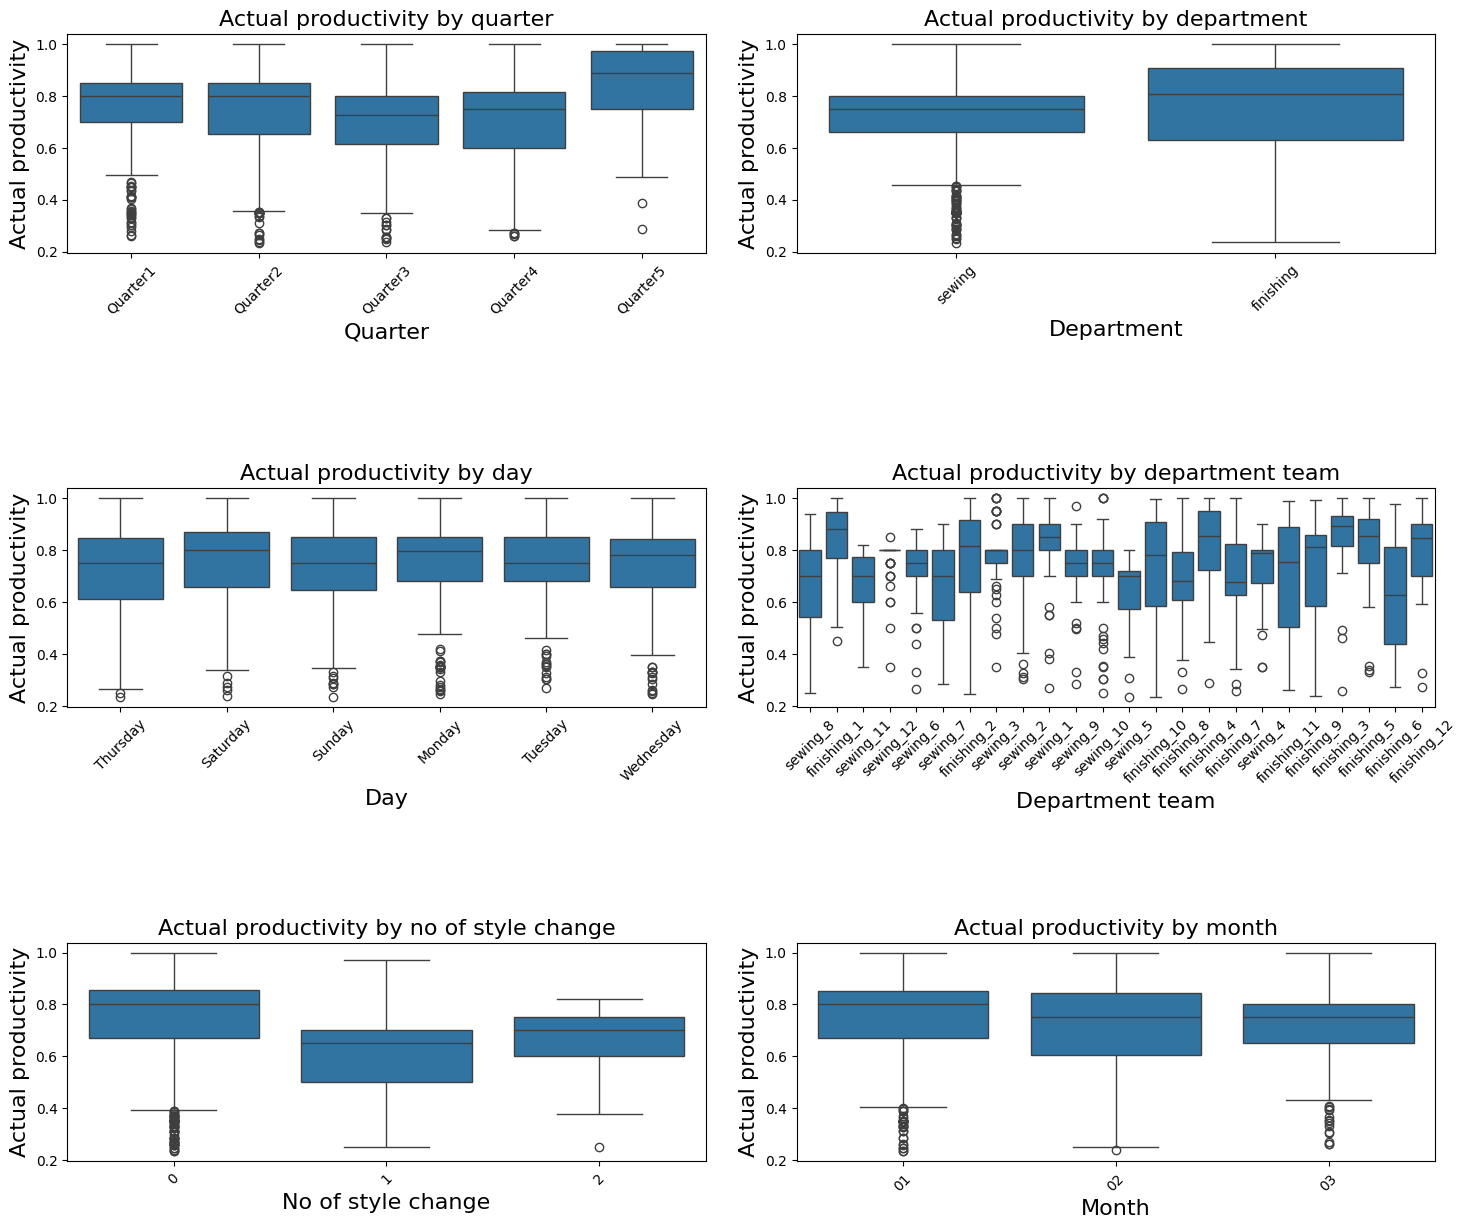

In [ ]:
# prompt: Make the x ticks rotate 45 in the previous code. capitalise the 1st letter in x label

fig,axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12,8))

for i, ax in enumerate(axes.ravel()):
  # if i <= 2:
    sns.boxplot(data = garment_trainer, x = categorical[i], y = 'actual_productivity', ax = ax)
    ax.set_title(f"Actual productivity by {title(categorical[i])}",fontsize=16)
    ax.set_xlabel(title(categorical[i]).capitalize(),  fontsize=16)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45) # Rotate x-axis labels
    ax.set_ylabel("Actual productivity" , fontsize=16)

fig.tight_layout()
plt.subplots_adjust(top=1.5,right=1.2)
plt.show()

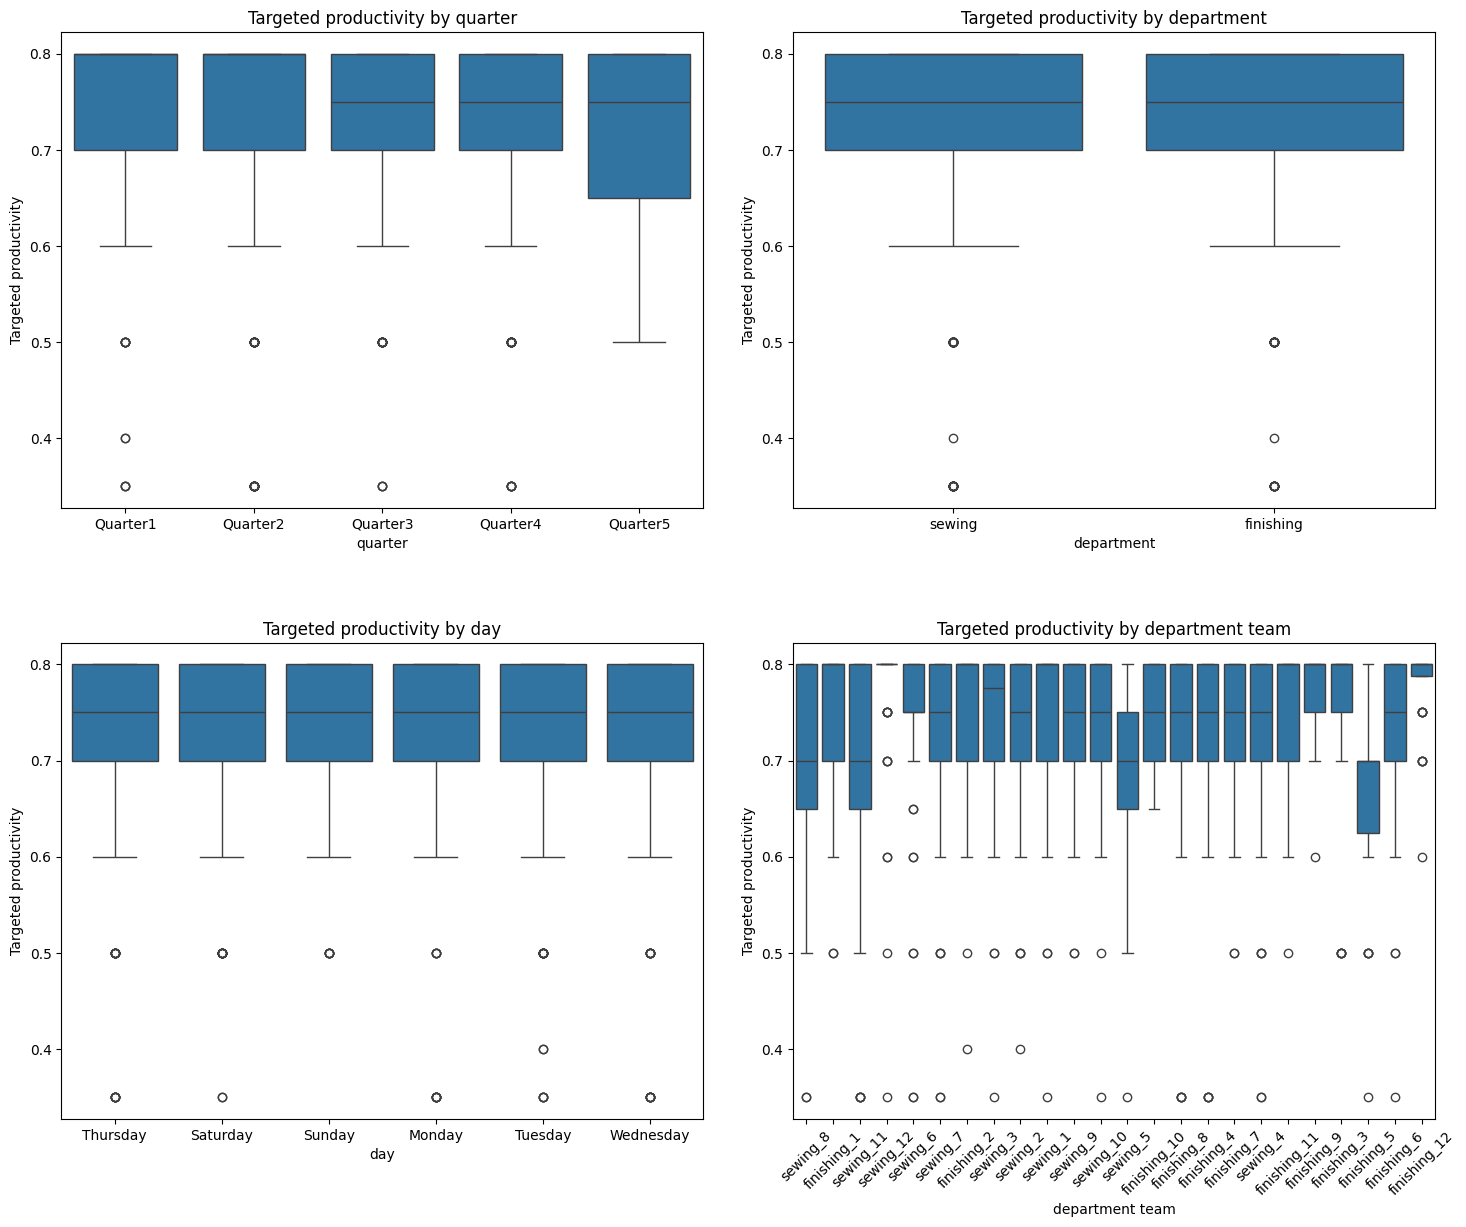

In [ ]:
fig,axes = plt.subplots(nrows = 2, ncols = 2, figsize = (12,8))

for i, ax in enumerate(axes.ravel()):
  # if i <= 2:
    sns.boxplot(data = garment_trainer, x = categorical[i], y = 'targeted_productivity', ax = ax)
    ax.set_title(f"Targeted productivity by {title(categorical[i])}")
    ax.set_xlabel(title(categorical[i]))
    plt.xticks(rotation=45)
    ax.set_ylabel("Targeted productivity")

fig.tight_layout()
plt.subplots_adjust(top=1.5,right=1.2)
plt.show()

Observations:

The median actual productivity is highest:

* Quarters: during the first 2 quarters of the month.
* Department: in the "finishing" department
* Day: on Saturdays

**Camprison between Actual and Targeted Productivity over time**

In [ ]:
# # Line plot to check actual and targeted productivity
# plt.figure(figsize = (10,6))

# sns.lineplot(x = 'date', y = 'actual_productivity', data = garment_trainer, ci = None, color = 'orange', errorbar=None)
# sns.lineplot(x = 'date', y = 'targeted_productivity', data = garment_trainer, ci = None, color = 'darkblue', errorbar=None)

# plt.legend(labels = ['actual_productivity','targeted_productivity'])
# plt.ylabel("productivity")
# plt.title("Comparison between Actual and Targeted Productivity over time")
# plt.show()

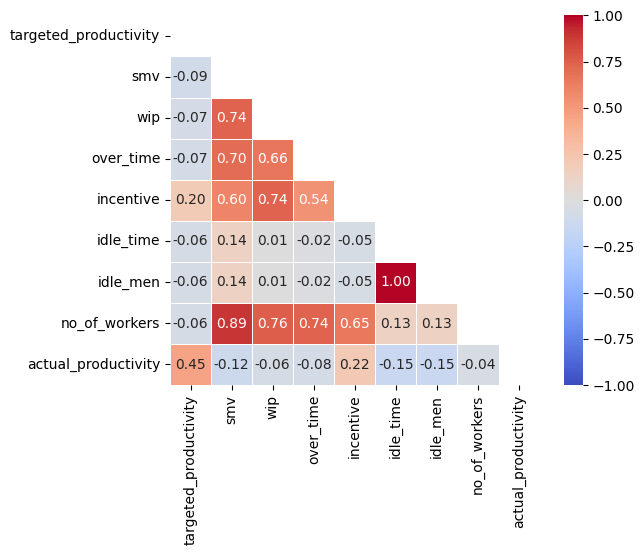

In [ ]:
# print(garment[numerical].corr())

# plotting correlation heatmap
# dataplot = sns.heatmap(garment[numerical].corr(), cmap="coolwarm", annot=True)
mask = np.triu(np.ones_like(garment_trainer[numerical].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(garment_trainer[numerical].corr(method = 'spearman'),cmap = 'coolwarm',
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f",
                       square=True, linewidths = 0.5, mask = mask)

# displaying heatmap
plt.show()

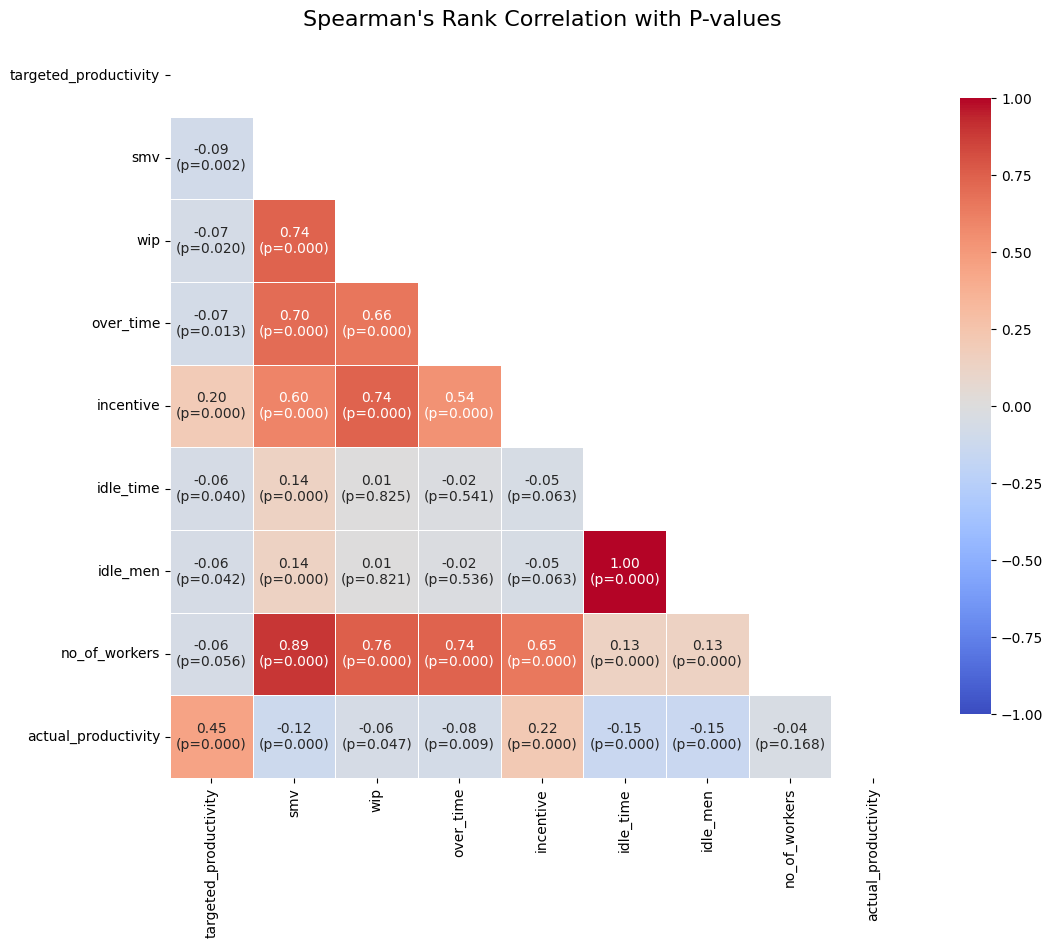

In [ ]:
# prompt: I need the code to add correlation values and the respective p-values. But I need to indicate these two values inside the same tile. 1st value should be the correlation value and the other should be the respective p -value. use Spearman's rank correlation since the data is non normal. add the column names. combine the two values into one graph

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Assuming 'garment' DataFrame is already loaded and preprocessed as in your original code

# Calculate Spearman's rank correlation and p-values
numerical_cols = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']
correlation_matrix = garment_trainer[numerical_cols].corr(method='spearman')
p_value_matrix = np.zeros_like(correlation_matrix)

for i in range(len(numerical_cols)):
    for j in range(i + 1, len(numerical_cols)):  # Avoid redundant calculations and diagonal
        correlation, p_value = spearmanr(garment_trainer[numerical_cols[i]], garment_trainer[numerical_cols[j]])
        correlation_matrix.iloc[i, j] = correlation
        correlation_matrix.iloc[j, i] = correlation  # Make it symmetric
        p_value_matrix[i, j] = p_value
        p_value_matrix[j, i] = p_value

# Create a combined annotation string
annotation_matrix = np.empty_like(correlation_matrix, dtype=object)
for i in range(len(numerical_cols)):
  for j in range(len(numerical_cols)):
    annotation_matrix[i,j] = f"{correlation_matrix.iloc[i,j]:.2f}\n(p={p_value_matrix[i,j]:.3f})"

# Plotting the heatmap with combined annotations
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=annotation_matrix, fmt="",
            vmin=-1, vmax=1, center=0, mask=mask, square=True, linewidths=.5,
            cbar_kws={"shrink": .8})
plt.title("Spearman's Rank Correlation with P-values", fontsize=16)
plt.show()

* Targeted productivity has a moderate correlation with actual productivity
* standard minute value has very strong positive correlations with number of workers and a positive correlation with overtime, incentive and work in progress
* work in progress has strong positive correlation with number of workers, incentive and overtime
* Over time has a strong positive correlation with number of workers and incentive
* Idle time and idle men have a strong positive correlation
* Incentive and number of workers are strongly positively correlated

### **Modeling**

Regression model to predict the actual productivity

In [ ]:
# from sklearn.model_selection import KFold
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder

In [ ]:
# prompt: code to round up actual_productivity values to 3 decimal points

garment_trainer['actual_productivity'] = garment_trainer['actual_productivity'].round(3)


In [ ]:
garment_trainer.head()

,month,quarter,department,day,department_team,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01,Quarter1,sewing,Thursday,sewing_8,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.941
1,01,Quarter1,finishing,Thursday,finishing_1,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886
2,01,Quarter1,sewing,Thursday,sewing_11,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.801
3,01,Quarter1,sewing,Thursday,sewing_12,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.801
4,01,Quarter1,sewing,Thursday,sewing_6,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800


In [ ]:
garment_trainer.columns

Index(['month', 'quarter', 'department', 'day', 'department_team', 'team',
       'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
       'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers',
       'actual_productivity'],
      dtype='object')

In [ ]:
garment_trainer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   department_team        1197 non-null   object 
 5   team                   1197 non-null   object 
 6   targeted_productivity  1197 non-null   float64
 7   smv                    1197 non-null   float64
 8   wip                    1197 non-null   float64
 9   over_time              1197 non-null   int64  
 10  incentive              1197 non-null   int64  
 11  idle_time              1197 non-null   float64
 12  idle_men               1197 non-null   int64  
 13  no_of_style_change     1197 non-null   int64  
 14  no_of_workers          1197 non-null   int64  
 15  actu

In [ ]:
garment_trainer['team'] = garment_trainer['team'].astype(str)
garment_trainer['no_of_style_change'] = garment_trainer['no_of_style_change'].astype(str)

In [ ]:
garment_trainer = garment_trainer.drop(['department_team'], axis = 1)

In [ ]:
garment_trainer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   object 
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    1197 non-null   float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   object 
 13  no_of_workers          1197 non-null   int64  
 14  actual_productivity    1197 non-null   float64
dtypes: f

In [ ]:
numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

In [ ]:
# Function to detect and remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Iterate over numerical columns and remove outliers
for column in numerical:
    garment_trainer = remove_outliers_iqr(garment_trainer, column)

garment_trainer.loc[garment_trainer['actual_productivity'] == 0.07, 'targeted_productivity'] = 0.7

# Reset index
garment_trainer = garment_trainer.reset_index(drop=True)

# Display the dataset without outliers
garment_trainer

,month,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,01,Quarter1,sewing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59,0.941
1,01,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8,0.886
2,01,Quarter1,sewing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.801
3,01,Quarter1,sewing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30,0.801
4,01,Quarter1,sewing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56,0.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,03,Quarter2,sewing,Wednesday,7,0.65,30.48,935.0,6840,26,0.0,0,1,57,0.651
1013,03,Quarter2,finishing,Wednesday,10,0.75,2.90,0.0,960,0,0.0,0,0,8,0.628
1014,03,Quarter2,finishing,Wednesday,8,0.70,3.90,0.0,960,0,0.0,0,0,8,0.626
1015,03,Quarter2,finishing,Wednesday,7,0.65,3.90,0.0,960,0,0.0,0,0,8,0.626


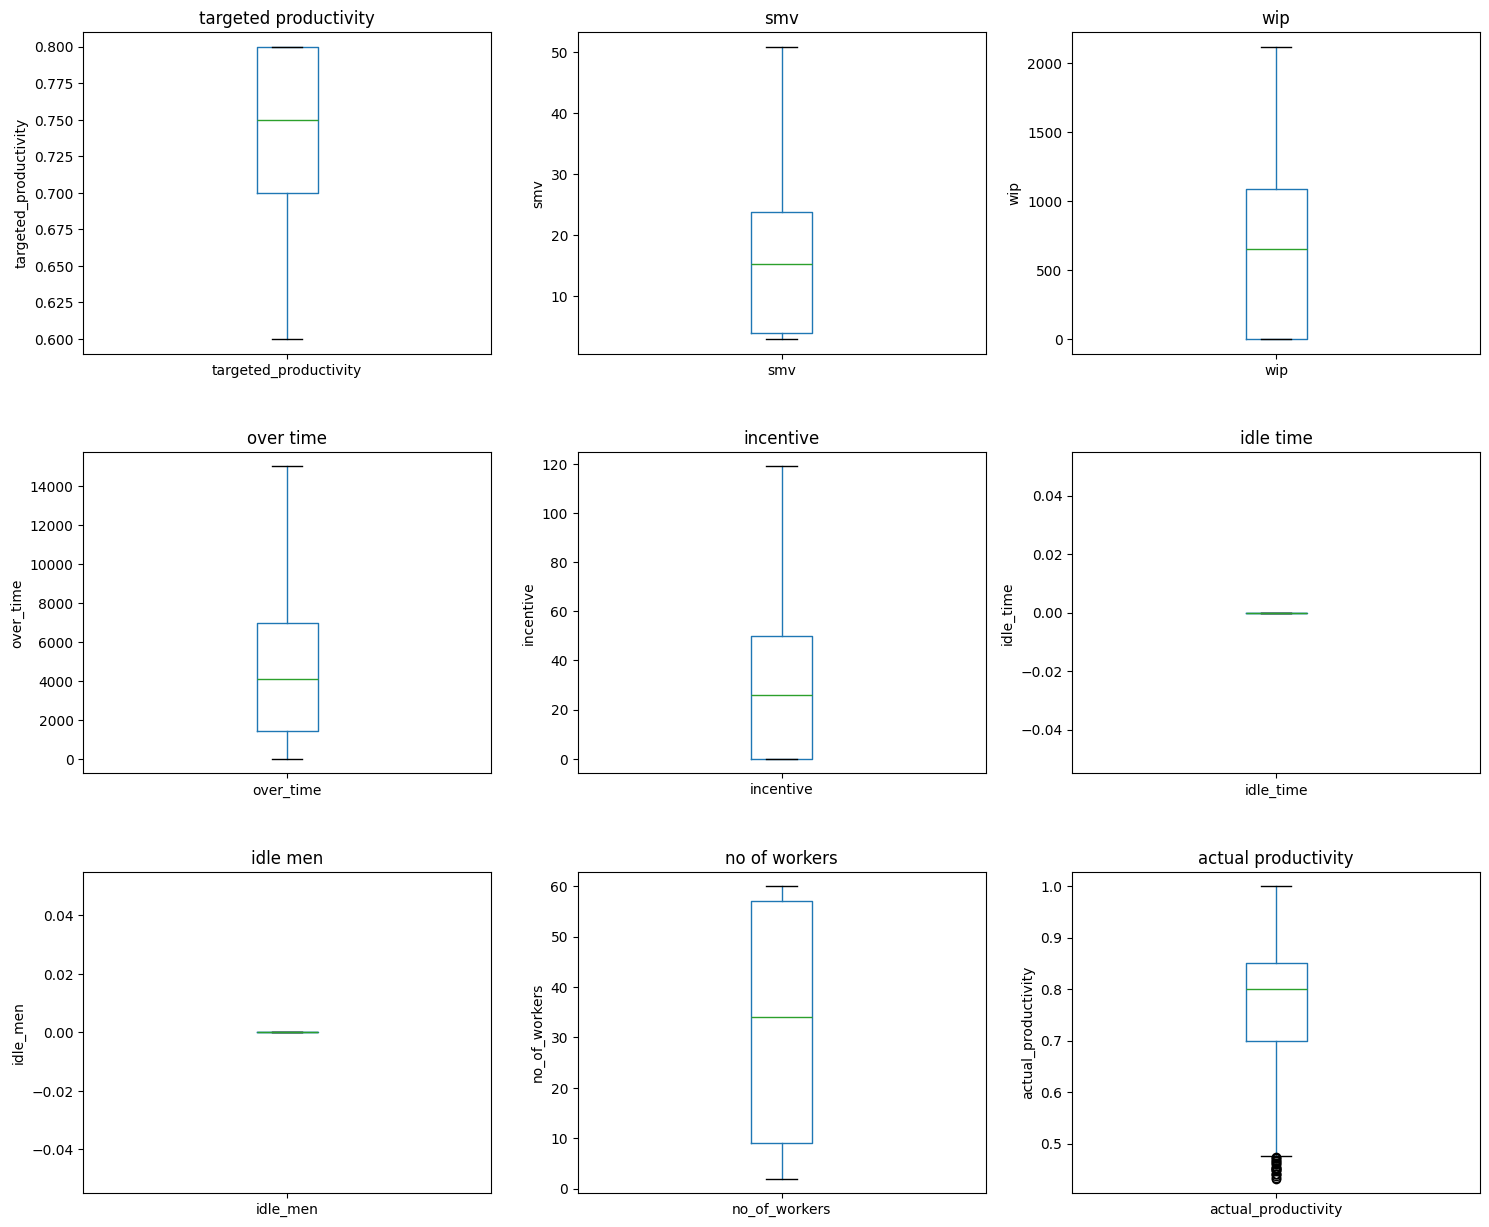

In [ ]:
# categorical = ["quarter", "department", "day", "team"]
# numerical = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'no_of_workers', 'actual_productivity']

def title(x):
  return x.replace('_', ' ')

fig,axes = plt.subplots(nrows=3, ncols=3,figsize=(15,8))


#plotting boxplots
for i, ax in enumerate(axes.ravel()):
  garment_trainer.boxplot(numerical[i], grid=False, ax=ax)
  ax.set_title(f"{title(numerical[i])}")
  ax.set_ylabel(numerical[i])


fig.tight_layout()
plt.subplots_adjust(top=1.5)
plt.show()

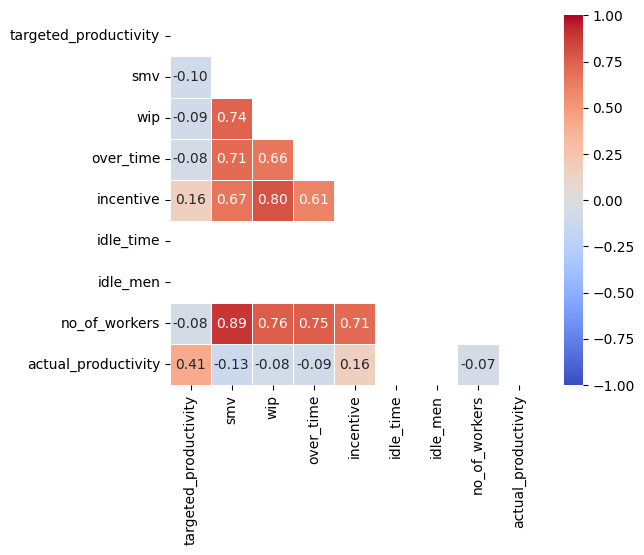

In [ ]:
mask = np.triu(np.ones_like(garment_trainer[numerical].corr(method = 'spearman'), dtype=bool))

dataplot = sns.heatmap(garment_trainer[numerical].corr(method = 'spearman'),cmap = 'coolwarm',
                       vmin = -1, vmax = 1, center = 0, annot = True, fmt=".2f",
                       square=True, linewidths = 0.5, mask = mask)

# displaying heatmap
plt.show()

In [ ]:
categorical

['quarter',
 'department',
 'day',
 'department_team',
 'no_of_style_change',
 'month']

In [ ]:
numerical

['targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_workers',
 'actual_productivity']

In [ ]:
# Preparing X and Y variables

# X = garment_updated['targeted_productivity']
X = garment_trainer.drop(columns = ['actual_productivity'], axis = 1)
y = garment_trainer['actual_productivity']



In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  1017 non-null   object 
 1   quarter                1017 non-null   object 
 2   department             1017 non-null   object 
 3   day                    1017 non-null   object 
 4   team                   1017 non-null   object 
 5   targeted_productivity  1017 non-null   float64
 6   smv                    1017 non-null   float64
 7   wip                    1017 non-null   float64
 8   over_time              1017 non-null   int64  
 9   incentive              1017 non-null   int64  
 10  idle_time              1017 non-null   float64
 11  idle_men               1017 non-null   int64  
 12  no_of_style_change     1017 non-null   object 
 13  no_of_workers          1017 non-null   int64  
dtypes: float64(4), int64(4), object(6)
memory usage: 111.4+ 

In [ ]:
num_features = X.select_dtypes(exclude = 'object').columns
cat_features = X.select_dtypes(include = 'object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
one_hot_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", one_hot_transformer, cat_features),
        ("StandardScaler", numeric_transformer, num_features),
    ]
)

In [ ]:
X_trans = preprocessor.fit_transform(X)

In [ ]:
X_trans.shape

(1017, 39)

In [ ]:
X_trans[1]

array([ 1.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        , -0.04293448, -1.03230976, -1.04560137, -1.10725931,
       -0.90960111,  0.        ,  0.        , -1.21421022])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_trans, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((813, 39), (204, 39))

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.4 MB/s eta 0:00:00


In [ ]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
# evaluation metric after model training
def model_evaluation(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [ ]:
models = {
    # "Linear Regression": LinearRegression(),
    "Lasso": Lasso(alpha=0.001),
    "Ridge": Ridge(random_state=0),
    # "K-Neighbors Regressor": KNeighborsRegressor(),
    # "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(n_estimators=60, random_state=10, max_depth=8),
    "XGBRegressor": XGBRegressor(),
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = model_evaluation(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = model_evaluation(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*35)
    print('\n')

Lasso
Model performance for Training set
- Root Mean Squared Error: 0.0995
- Mean Absolute Error: 0.0710
- R2 Score: 0.3811
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0971
- Mean Absolute Error: 0.0673
- R2 Score: 0.3797


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.0981
- Mean Absolute Error: 0.0714
- R2 Score: 0.3980
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0979
- Mean Absolute Error: 0.0692
- R2 Score: 0.3691


Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0592
- Mean Absolute Error: 0.0371
- R2 Score: 0.7811
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.0868
- Mean Absolute Error: 0.0538
- R2 Score: 0.5043


XGBRegressor
Model performance for Training set
- Root Mean Squared Error: 0.0079
- Mean Absolute Error: 0.0048
- R2 Score: 0.9961
--------------------------

In [ ]:
pd.DataFrame(list(zip(model_list, r2_list, )), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Random Forest Regressor,0.504307
4,CatBoosting Regressor,0.451976
3,XGBRegressor,0.396609
5,AdaBoost Regressor,0.394754
0,Lasso,0.379690
1,Ridge,0.369124


### Random foreset regressor

In [ ]:
model_test = RandomForestRegressor(n_estimators=60, random_state=10, max_depth=8)
model_test.fit(X_train, y_train)

y_train_pred_test = model_test.predict(X_train)
y_test_pred_test = model_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0592
- Mean Absolute Error: 0.0371
- R2 Score: 0.7811

Model performance for Testing set
- Root Mean Squared Error: 0.0868
- Mean Absolute Error: 0.0538
- R2 Score: 0.5043


In [ ]:
## for all don't change

model_test = RandomForestRegressor(n_estimators = 80, random_state=0, max_depth=10)
model_test.fit(X_train, y_train)

y_train_pred_test = model_test.predict(X_train)
y_test_pred_test = model_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0481
- Mean Absolute Error: 0.0300
- R2 Score: 0.8554

Model performance for Testing set
- Root Mean Squared Error: 0.0875
- Mean Absolute Error: 0.0529
- R2 Score: 0.4968


In [ ]:
test_prediction = pd.DataFrame(list(zip(y_test, y_test_pred_test)), columns=['y_test', 'y_prediction'])
test_prediction

train_prediction = pd.DataFrame(list(zip(y_train, y_train_pred_test)), columns=['y_train', 'y_train_prediction'])
train_prediction

,y_train,y_train_prediction
0,1.000,0.985575
1,0.610,0.700309
2,0.956,0.884976
3,0.800,0.808224
4,0.929,0.855049
...,...,...
808,0.851,0.850671
809,0.466,0.515457
810,0.800,0.801227
811,0.801,0.796973


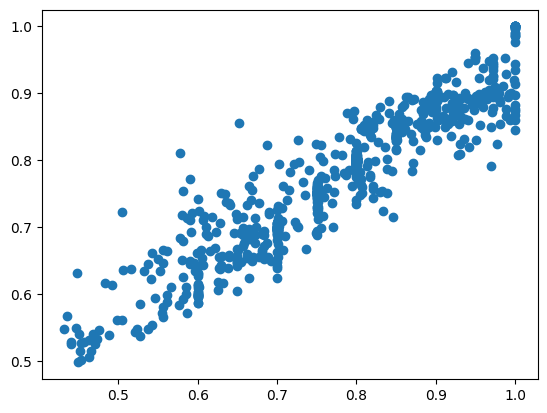

In [ ]:
plt.scatter(train_prediction['y_train'], train_prediction['y_train_prediction'])
plt.show()

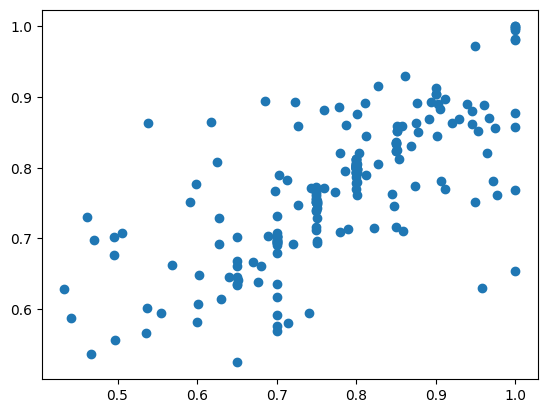

In [ ]:
plt.scatter(test_prediction['y_test'], test_prediction['y_prediction'])
plt.show()

In [ ]:
cat_test = CatBoostRegressor(iterations= 1000, learning_rate=0.01, verbose=False, depth = 10)
cat_test.fit(X_train, y_train)

y_train_pred_test = cat_test.predict(X_train)
y_test_pred_test = cat_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0454
- Mean Absolute Error: 0.0298
- R2 Score: 0.8712

Model performance for Testing set
- Root Mean Squared Error: 0.0868
- Mean Absolute Error: 0.0538
- R2 Score: 0.5041


In [ ]:
# don't change
cat_test = CatBoostRegressor(iterations= 1000, learning_rate=0.01, verbose=False, depth = 12)
cat_test.fit(X_train, y_train)

y_train_pred_test = cat_test.predict(X_train)
y_test_pred_test = cat_test.predict(X_test)

model_train_mae_1 , model_train_rmse_1, model_train_r2_1 = model_evaluation(y_train, y_train_pred_test)
model_test_mae_1 , model_test_rmse_1, model_test_r2_1 = model_evaluation(y_test, y_test_pred_test)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_train_mae_1))
print("- R2 Score: {:.4f}".format(model_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae_1))
print("- R2 Score: {:.4f}".format(model_test_r2_1))

Model performance for Training set
- Root Mean Squared Error: 0.0360
- Mean Absolute Error: 0.0237
- R2 Score: 0.9191

Model performance for Testing set
- Root Mean Squared Error: 0.0876
- Mean Absolute Error: 0.0543
- R2 Score: 0.4948


In [ ]:
numerical

['targeted_productivity',
 'smv',
 'wip',
 'over_time',
 'incentive',
 'idle_time',
 'idle_men',
 'no_of_workers',
 'actual_productivity']

In [ ]:
garment_trainer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017 entries, 0 to 1016
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   month                  1017 non-null   object 
 1   quarter                1017 non-null   object 
 2   department             1017 non-null   object 
 3   day                    1017 non-null   object 
 4   team                   1017 non-null   object 
 5   targeted_productivity  1017 non-null   float64
 6   smv                    1017 non-null   float64
 7   wip                    1017 non-null   float64
 8   over_time              1017 non-null   int64  
 9   incentive              1017 non-null   int64  
 10  idle_time              1017 non-null   float64
 11  idle_men               1017 non-null   int64  
 12  no_of_style_change     1017 non-null   object 
 13  no_of_workers          1017 non-null   int64  
 14  actual_productivity    1017 non-null   float64
dtypes: f

In [ ]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from catboost import CatBoostRegressor
# from sklearn.metrics import mean_squared_error, r2_score
# from sklearn.preprocessing import LabelEncoder

# X_data = garment_trainer.drop(['actual_productivity', 'idle_men', 'idle_time'], axis=1)
# y_data = garment_trainer['actual_productivity']


# # Identify categorical features
# categorical_features_indices = []
# for i, column in enumerate(X_data.columns):
#     if X_data[column].dtype == object:  # Check if the column is of object type (string/categorical)
#         categorical_features_indices.append(i)
#     elif pd.api.types.is_categorical_dtype(X_data[column]): # Check if the column is of categorical type
#         categorical_features_indices.append(i)

# # If your categorical features are already encoded as integers, you can remove this part
# # If not, you can use Label Encoding for string categorical features
# for column_index in categorical_features_indices:
#     le = LabelEncoder()
#     X_data.iloc[:, column_index] = le.fit_transform(X_data.iloc[:, column_index])

# # Split data into training and testing sets
# X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X_data, y_data, test_size=0.2, random_state=10) # 80% train, 20% test

# # # Initialize and train the CatBoost Regressor
# # model = CatBoostRegressor(iterations=1000, # Number of trees (you can tune this)
# #                            learning_rate=0.01, # Learning rate (you can tune this)
# #                            depth=6,            # Tree depth (you can tune this)
# #                                  # Random seed for reproducibility
# #                            verbose=False,          # Print training progress every 100 iterations
# #                            cat_features=categorical_features_indices) #Explicitly tell catboost about categorical features

#                            # Initialize and train the CatBoost Regressor
# cat_model = CatBoostRegressor(iterations=4000, # Number of trees (you can tune this)
#                            learning_rate=0.01, # Learning rate (you can tune this)
#                            depth=10,            # Tree depth (you can tune this)
#                            l2_leaf_reg=12,
#                            loss_function='RMSE',
#                            eval_metric='R2',
#                            verbose=False,          # Print training progress every 100 iterations
#                            cat_features=categorical_features_indices) #Explicitly tell catboost about categorical features


# cat_model.fit(X_train_cat, y_train_cat) # Use early stopping , early_stopping_rounds=50

# # # Make predictions on the test set
# # y_pred_cat = cat_model.predict(X_test_cat)

# # # Evaluate the model
# # rmse = np.sqrt(mean_squared_error(y_test_cat, y_pred_cat)) #calculating RMSE
# # r2 = r2_score(y_test_cat, y_pred_cat) #calculating R squared
# # print(f"RMSE: {rmse}")
# # print(f"R-squared: {r2}")

# #return mae, rmse, r2_square

# y_train_pred_test_cat = cat_model.predict(X_train_cat)
# y_test_pred_test_cat = cat_model.predict(X_test_cat)

# cat_train_mae_1 , cat_train_rmse_1, cat_train_r2_1 = model_evaluation(y_train_cat, y_train_pred_test_cat)
# cat_model_test_mae_1 , cat_model_test_rmse_1, cat_model_test_r2_1 = model_evaluation(y_test_cat, y_test_pred_test_cat)

# print('Model performance for Training set')
# print("- Root Mean Squared Error: {:.4f}".format(cat_train_mae_1))
# print("- Mean Absolute Error: {:.4f}".format(cat_train_rmse_1))
# print("- R2 Score: {:.4f}".format(cat_train_r2_1))

# print('\nModel performance for Testing set')
# print("- Root Mean Squared Error: {:.4f}".format(cat_model_test_rmse_1))
# print("- Mean Absolute Error: {:.4f}".format(cat_model_test_mae_1))
# print("- R2 Score: {:.4f}".format(cat_model_test_r2_1))

# #Feature importance
# feature_importances = cat_model.feature_importances_
# feature_names = X_data.columns
# importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
# importance_df = importance_df.sort_values(by='Importance', ascending=False)
# print("\nFeature Importances:")
# print(importance_df)

# # Save the trained model (optional)
# # model.save_model("catboost_model.cbm")

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

def model_evaluation(y_true, y_pred):
  """
  This function calculates and returns the MAE, RMSE, and R-squared scores.
  """
  mae = mean_absolute_error(y_true, y_pred)
  rmse = np.sqrt(mean_squared_error(y_true, y_pred))
  r2 = r2_score(y_true, y_pred)
  return mae, rmse, r2

# Load your data
X_data = garment_trainer.drop(['actual_productivity'], axis=1)
y_data = garment_trainer['actual_productivity']

# Separate features and target variable
X = X_data.copy()  # Avoid modifying the original data

# Identify data types
numerical_features = X.select_dtypes(include=[np.number])
categorical_features = X.select_dtypes(include=object)

# Preprocess categorical features
categorical_features_indices = categorical_features.columns.tolist()
for column_index in categorical_features_indices:
  le = LabelEncoder()
  X.iloc[:, X.columns.get_loc(column_index)] = le.fit_transform(X.iloc[:, X.columns.get_loc(column_index)])

# Preprocess numerical features (standard scaling)
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Combine scaled numerical features with categorical features
X = pd.concat([pd.DataFrame(numerical_features_scaled, columns=numerical_features.columns), X[categorical_features.columns]], axis=1)

# Split data into training and testing sets
X_train_cat, X_test_cat, y_train_cat, y_test_cat = train_test_split(X, y_data, test_size=0.2, random_state=10)

# Initialize and train the CatBoost Regressor
cat_model = CatBoostRegressor(iterations=5000,
                              learning_rate=0.01,
                              depth=6,
                              verbose=100,# Print training progress every 100 iterations
                              cat_features=categorical_features_indices)
                                  # iterations=4000,  # Number of trees (you can tune this)
#                                learning_rate=0.1,  # Learning rate (you can tune this)
#                                depth=10,           # Tree depth (you can tune this)
#                                l2_leaf_reg=8,
#                                loss_function='RMSE',
#                                eval_metric='R2',
                                 # Explicitly tell catboost about categorical features

cat_model.fit(X_train_cat, y_train_cat, early_stopping_rounds=50)  # Use early stopping

# Make predictions on the test set
y_train_pred_test_cat = cat_model.predict(X_train_cat)
y_test_pred_test_cat = cat_model.predict(X_test_cat)

# Evaluate the model
cat_train_mae_1, cat_train_rmse_1, cat_train_r2_1 = model_evaluation(y_train_cat, y_train_pred_test_cat)
cat_model_test_mae_1, cat_model_test_rmse_1, cat_model_test_r2_1 = model_evaluation(y_test_cat, y_test_pred_test_cat)

print('Model performance for Training set')
print("- Root Mean Squared Error: {:.4f}".format(cat_train_mae_1))
print("- Mean Absolute Error: {:.4f}".format(cat_train_rmse_1))
print("- R2 Score: {:.4f}".format(cat_train_r2_1))

print('\nModel performance for Testing set')
print("- Root Mean Squared Error: {:.4f}".format(cat_model_test_rmse_1))
print("- Mean Absolute Error: {:.4f}".format(cat_model_test_mae_1))
print("- R2 Score: {:.4f}".format(cat_model_test_r2_1))

#Feature importance
feature_importances = cat_model.feature_importances_
feature_names = X_data.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df)

0:	learn: 0.1254616	total: 3.55ms	remaining: 17.8s
100:	learn: 0.1050602	total: 296ms	remaining: 14.4s
200:	learn: 0.0962689	total: 586ms	remaining: 14s
300:	learn: 0.0912746	total: 893ms	remaining: 13.9s
400:	learn: 0.0884563	total: 1.24s	remaining: 14.2s
500:	learn: 0.0860539	total: 1.54s	remaining: 13.8s
600:	learn: 0.0837157	total: 1.84s	remaining: 13.5s
700:	learn: 0.0817016	total: 2.17s	remaining: 13.3s
800:	learn: 0.0795653	total: 2.49s	remaining: 13s
900:	learn: 0.0779557	total: 2.81s	remaining: 12.8s
1000:	learn: 0.0763634	total: 3.19s	remaining: 12.7s
1100:	learn: 0.0744782	total: 3.92s	remaining: 13.9s
1200:	learn: 0.0727111	total: 4.7s	remaining: 14.9s
1300:	learn: 0.0709903	total: 5.46s	remaining: 15.5s
1400:	learn: 0.0693719	total: 6.16s	remaining: 15.8s
1500:	learn: 0.0677749	total: 6.88s	remaining: 16s
1600:	learn: 0.0662641	total: 7.59s	remaining: 16.1s
1700:	learn: 0.0648550	total: 8.04s	remaining: 15.6s
1800:	learn: 0.0634990	total: 8.38s	remaining: 14.9s
1900:	learn

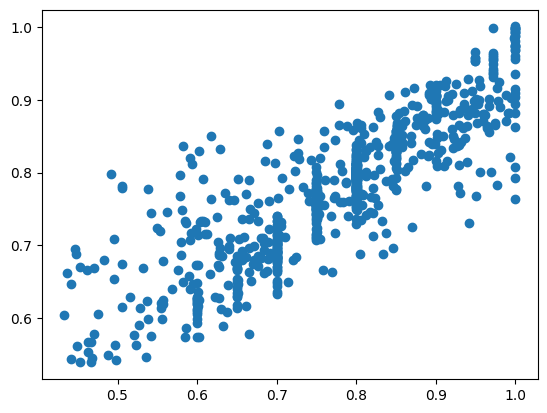

In [ ]:
test_prediction_cat = pd.DataFrame(list(zip(y_test_cat, y_test_pred_test_cat)), columns=['y_test_cat', 'y_test_prediction_cat'])
train_prediction_cat = pd.DataFrame(list(zip(y_train_cat, y_train_pred_test_cat)), columns=['y_train_cat', 'y_train_prediction_cat'])

plt.scatter(train_prediction_cat['y_train_cat'], train_prediction_cat['y_train_prediction_cat'])
plt.show()

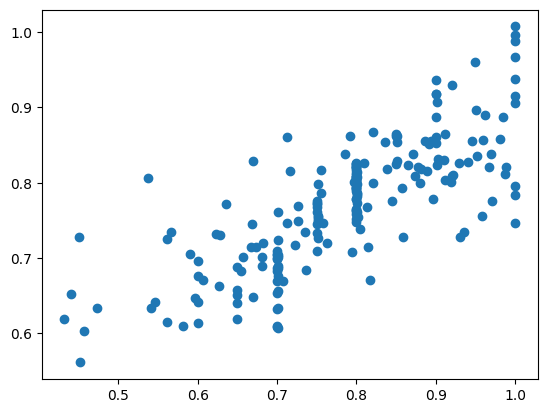

In [ ]:
plt.scatter(test_prediction_cat['y_test_cat'], test_prediction_cat['y_test_prediction_cat'])
plt.show()


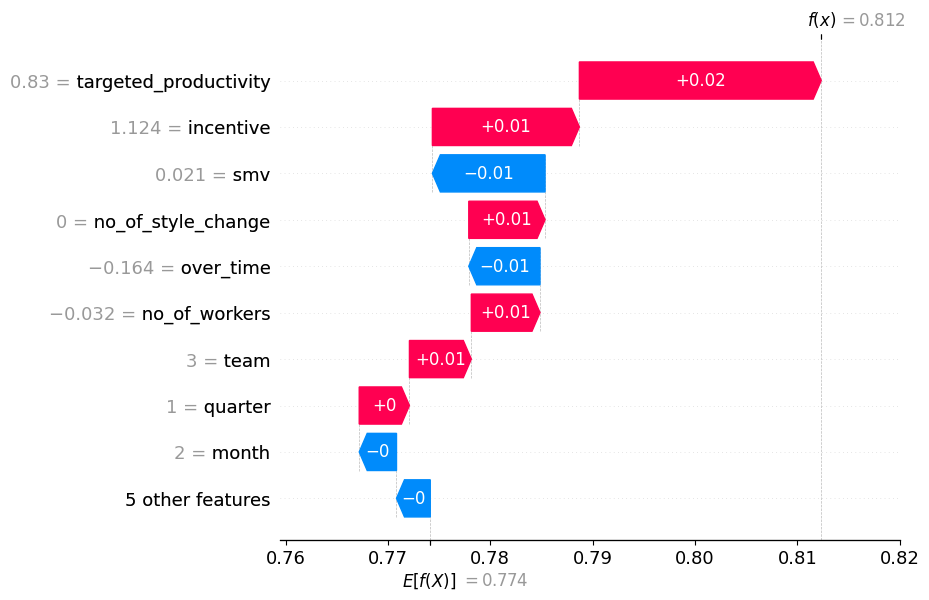

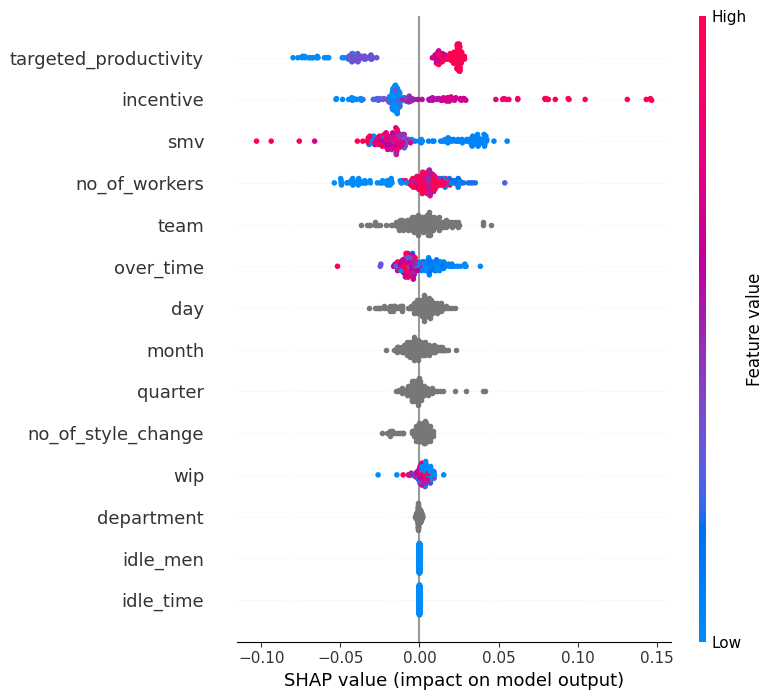

In [ ]:
import shap

# SHAP Analysis
explainer = shap.Explainer(cat_model)
shap_values = explainer(X_test_cat)

# Visualizations
shap.plots.waterfall(shap_values[0])  # Waterfall plot for the first prediction
shap.summary_plot(shap_values, X_test_cat) # Summary plot for all features

# Dependence plot (replace 'targeted_productivity' with your desired feature)
# shap.dependence_plot("targeted_productivity", shap_values.values, X_test_cat)

# Force plot (for individual predictions)
# Access the values attribute of the shap_values object for a single prediction
shap.force_plot(explainer.expected_value, shap_values[0].values, X_test_cat.iloc[0,:])

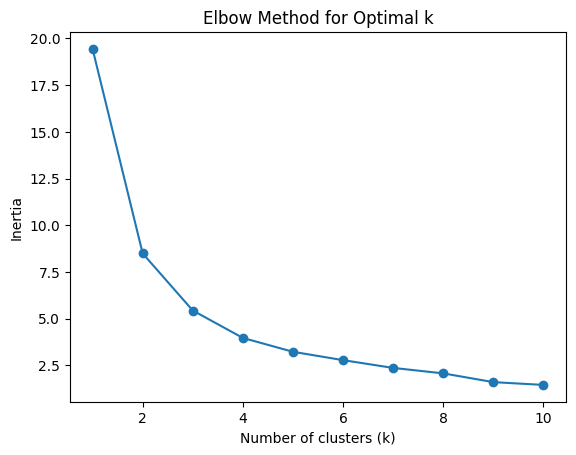


Cluster 0:
       targeted_productivity         smv          wip     over_time  \
count             230.000000  230.000000   230.000000    230.000000   
mean                0.772174    8.983696   338.730435   3178.630435   
std                 0.046111    8.258793   578.181494   2777.594459   
min                 0.600000    2.900000     0.000000      0.000000   
25%                 0.750000    3.940000     0.000000   1200.000000   
50%                 0.800000    4.150000     0.000000   1800.000000   
75%                 0.800000   22.520000   822.000000   6285.000000   
max                 0.800000   26.820000  1635.000000  12600.000000   

        incentive  idle_time  idle_men  no_of_workers  actual_productivity  \
count  230.000000      230.0     230.0     230.000000           230.000000   
mean    25.669565        0.0       0.0      23.526087             0.939448   
std     43.574505        0.0       0.0      20.324157             0.041978   
min      0.000000        0.0       0

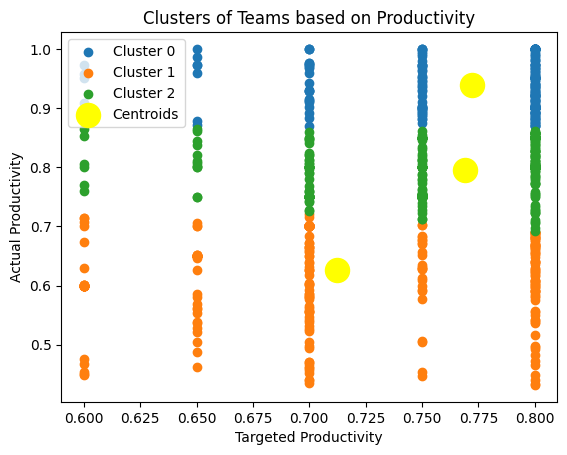

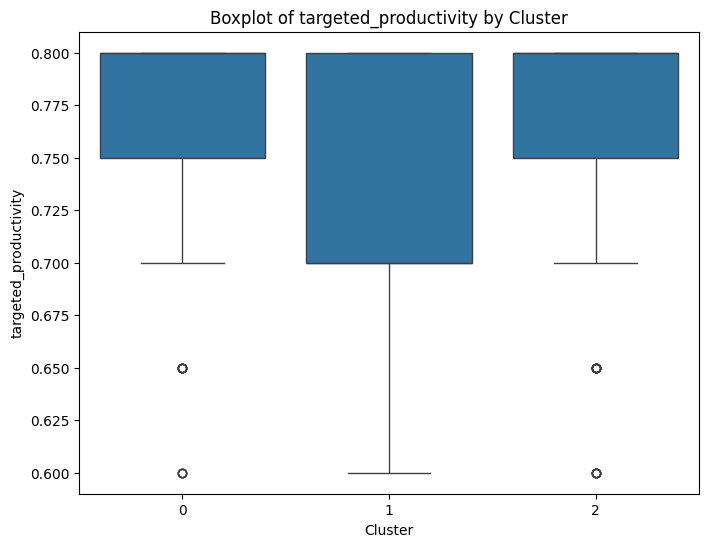

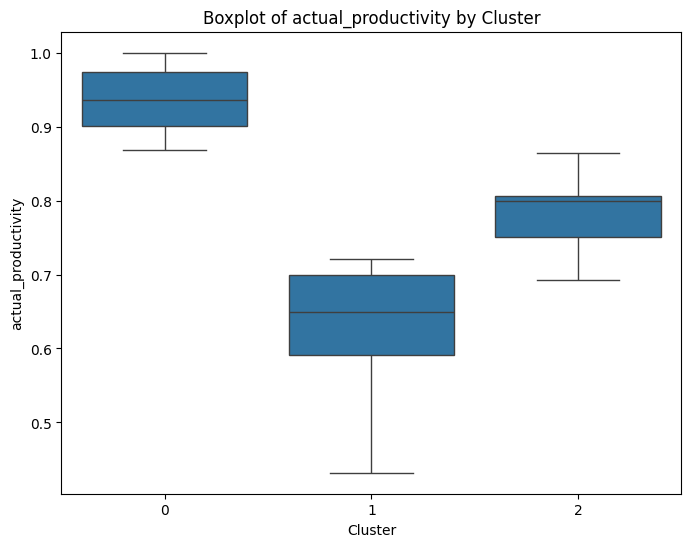

In [ ]:
# prompt: cluster teams based on the productivity and explain

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming 'garment_trainer' DataFrame is already loaded and preprocessed as in your code.
# Replace 'actual_productivity' with your actual productivity column if different.
# If 'garment_trainer' doesn't exist, replace with your DataFrame name
X = garment_trainer[['targeted_productivity', 'actual_productivity']]


# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method plot, choose an appropriate k value (e.g., k = 3)
k = 3  # Example, you might need to change based on the plot

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X)

# Add cluster labels to the DataFrame
garment_trainer['cluster'] = clusters

# Analyze clusters
for cluster_label in range(k):
    print(f"\nCluster {cluster_label}:")
    cluster_data = garment_trainer[garment_trainer['cluster'] == cluster_label]
    print(cluster_data.describe()) # Summary statistics for each cluster

    # Visualize clusters
    plt.scatter(cluster_data['targeted_productivity'], cluster_data['actual_productivity'], label=f'Cluster {cluster_label}')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of Teams based on Productivity')
plt.xlabel('Targeted Productivity')
plt.ylabel('Actual Productivity')
plt.legend()
plt.show()

#Further analysis, e.g., boxplots:

for column in ['targeted_productivity','actual_productivity']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y=column, data=garment_trainer)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

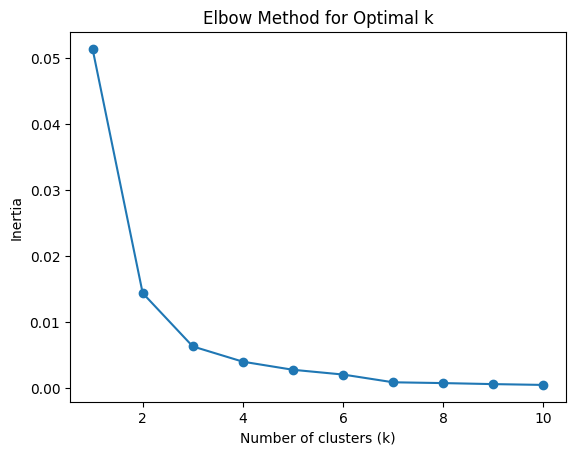


Cluster 0:
   department team  actual_productivity
8   finishing    6             0.713261
10  finishing    8             0.722659
14     sewing   11             0.723319
19     sewing    5             0.684739
21     sewing    7             0.735175
22     sewing    8             0.721205

Cluster 1:
   department team  actual_productivity
0   finishing    1             0.828435
1   finishing   10             0.806000
3   finishing   12             0.815432
4   finishing    2             0.817761
5   finishing    3             0.867645
6   finishing    4             0.818775
7   finishing    5             0.836556
12     sewing    1             0.844816
16     sewing    2             0.805900

Cluster 2:
   department team  actual_productivity
2   finishing   11             0.759565
9   finishing    7             0.750303
11  finishing    9             0.779256
13     sewing   10             0.765020
15     sewing   12             0.781255
17     sewing    3             0.788907
18  

IndexError: index 1 is out of bounds for axis 1 with size 1

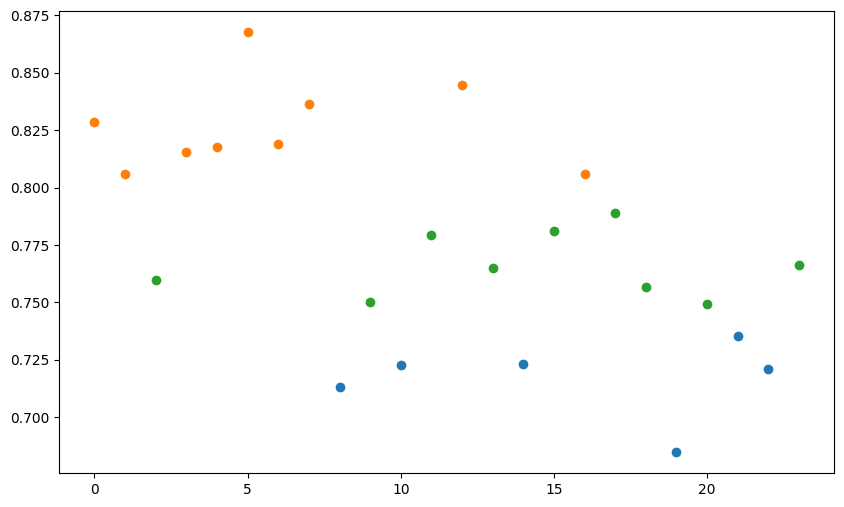

In [ ]:
# prompt: Cluster the teams and departments based only on  actual productivity and explain. output should indicate the relevent departments and the teams respectively

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'garment_trainer' DataFrame is already loaded and preprocessed.
# Replace 'actual_productivity' with your actual productivity column if different.
# If 'garment_trainer' doesn't exist, replace with your DataFrame name

# Select relevant columns for clustering
X = garment_trainer[['department', 'team', 'actual_productivity']]

# Convert 'actual_productivity' to numeric if it's not already
X['actual_productivity'] = pd.to_numeric(X['actual_productivity'], errors='coerce')
X.dropna(inplace=True)


# Group by department and team, then calculate the mean actual productivity
productivity_by_group = X.groupby(['department', 'team'])['actual_productivity'].mean().reset_index()


# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(productivity_by_group[['actual_productivity']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method plot, choose an appropriate k value (e.g., k = 3)
k = 3  # Example, you might need to change based on the plot

# Apply K-means clustering to the mean productivity values
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(productivity_by_group[['actual_productivity']])

# Add cluster labels to the grouped data
productivity_by_group['cluster'] = clusters

# Print the clusters with their corresponding departments and teams
for cluster_label in range(k):
    print(f"\nCluster {cluster_label}:")
    cluster_data = productivity_by_group[productivity_by_group['cluster'] == cluster_label]
    print(cluster_data[['department', 'team', 'actual_productivity']])

# Visualize the clusters (optional)
plt.figure(figsize=(10, 6))
for cluster_label in range(k):
    cluster_data = productivity_by_group[productivity_by_group['cluster'] == cluster_label]
    plt.scatter(cluster_data.index, cluster_data['actual_productivity'], label=f'Cluster {cluster_label}')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')

plt.title('Clusters of Teams/Departments based on Mean Actual Productivity')
plt.xlabel('Group Index')
plt.ylabel('Mean Actual Productivity')
plt.legend()
plt.show()

# Create boxplots to visualize the distribution of actual productivity within each cluster
for column in ['actual_productivity']:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='cluster', y=column, data=productivity_by_group)
    plt.title(f'Boxplot of {column} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(column)
    plt.show()

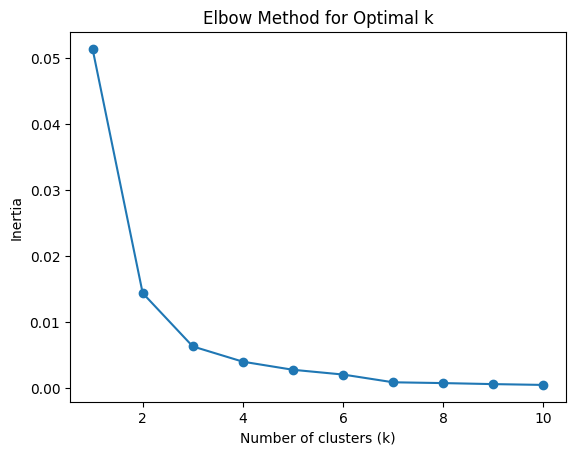


Cluster 0:
   department team  actual_productivity
8   finishing    6             0.713261
10  finishing    8             0.722659
14     sewing   11             0.723319
19     sewing    5             0.684739
21     sewing    7             0.735175
22     sewing    8             0.721205

Cluster 1:
   department team  actual_productivity
0   finishing    1             0.828435
1   finishing   10             0.806000
3   finishing   12             0.815432
4   finishing    2             0.817761
5   finishing    3             0.867645
6   finishing    4             0.818775
7   finishing    5             0.836556
12     sewing    1             0.844816
16     sewing    2             0.805900

Cluster 2:
   department team  actual_productivity
2   finishing   11             0.759565
9   finishing    7             0.750303
11  finishing    9             0.779256
13     sewing   10             0.765020
15     sewing   12             0.781255
17     sewing    3             0.788907
18  

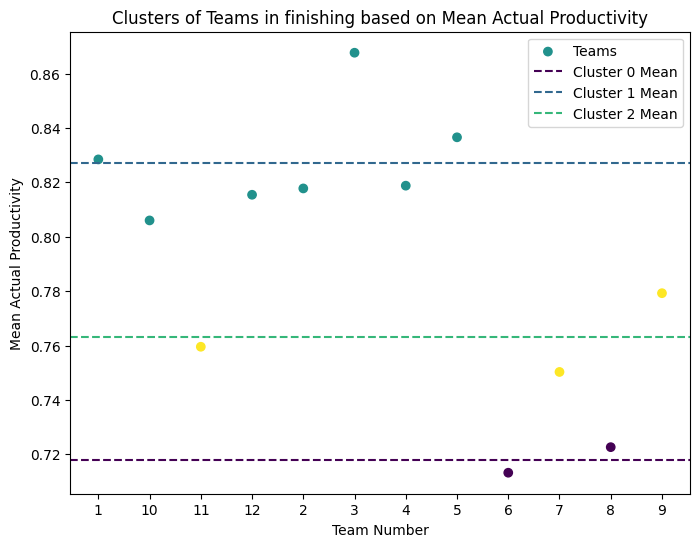

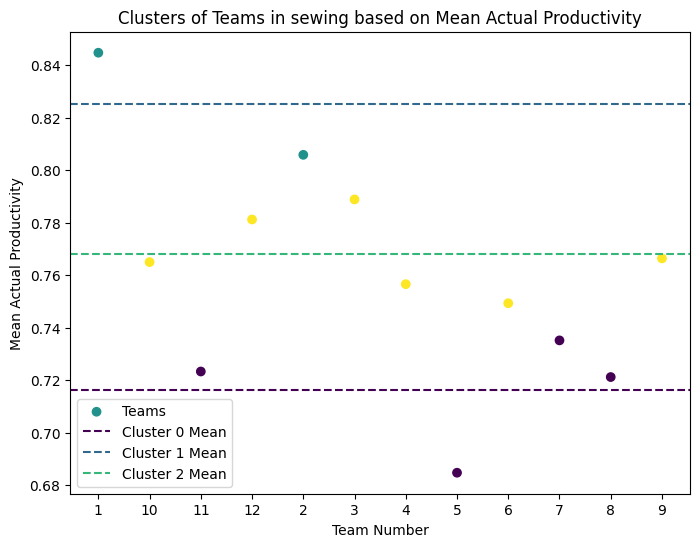

In [ ]:
# prompt: Cluster the teams and departments based only on actual productivity and explain.
# output should indicate the relevent departments and the teams respectively

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'garment_trainer' DataFrame is already loaded and preprocessed.
# Replace 'actual_productivity' with your actual productivity column if different.
# If 'garment_trainer' doesn't exist, replace with your DataFrame name

# Select relevant columns for clustering
X = garment_trainer[['department', 'team', 'actual_productivity']]

# Convert 'actual_productivity' to numeric if it's not already
X['actual_productivity'] = pd.to_numeric(X['actual_productivity'], errors='coerce')
X.dropna(inplace=True)


# Group by department and team, then calculate the mean actual productivity
productivity_by_group = X.groupby(['department', 'team'])['actual_productivity'].mean().reset_index()


# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(productivity_by_group[['actual_productivity']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method plot, choose an appropriate k value (e.g., k = 3)
k = 3  # Example, you might need to change based on the plot

# Apply K-means clustering to the mean productivity values
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(productivity_by_group[['actual_productivity']])

# Add cluster labels to the grouped data
productivity_by_group['cluster'] = clusters

# Print the clusters with their corresponding departments and teams
for cluster_label in range(k):
    print(f"\nCluster {cluster_label}:")
    cluster_data = productivity_by_group[productivity_by_group['cluster'] == cluster_label]
    print(cluster_data[['department', 'team', 'actual_productivity']])

# # Visualize the clusters (optional)
# # Visualize the clusters (optional)
# plt.figure(figsize=(10, 6))
# for cluster_label in range(k):
#     cluster_data = productivity_by_group[productivity_by_group['cluster'] == cluster_label]
#     plt.scatter(cluster_data.index, cluster_data['actual_productivity'], label=f'Cluster {cluster_label}')

# # The change is in the next line:
# # Get x,y coordinates of centroids for plotting
# centroids = kmeans.cluster_centers_
# plt.scatter(range(len(centroids)), centroids[:, 0], s=300, c='yellow', label='Centroids')

# plt.title('Clusters of Teams/Departments based on Mean Actual Productivity')
# plt.xlabel('Group Index')
# plt.ylabel('Mean Actual Productivity')
# plt.legend()
# plt.show()

for department in productivity_by_group['department'].unique():
    plt.figure(figsize=(8, 6))

    # Filter data for the current department
    department_data = productivity_by_group[productivity_by_group['department'] == department]

    # Scatter plot for teams within the department
    plt.scatter(department_data['team'], department_data['actual_productivity'],
                c=department_data['cluster'], cmap='viridis', label='Teams')

    # Plot cluster centroids as horizontal lines
    for cluster_label in range(k):
        cluster_mean = department_data[department_data['cluster'] == cluster_label]['actual_productivity'].mean()
        plt.axhline(cluster_mean, color=plt.cm.viridis(cluster_label / k), linestyle='--',
                    label=f'Cluster {cluster_label} Mean')

    plt.title(f'Clusters of Teams in {department} based on Mean Actual Productivity')
    plt.xlabel('Team Number')
    plt.ylabel('Mean Actual Productivity')
    plt.legend()
    plt.xticks(department_data['team']) # Ensure all team numbers are shown on x-axis
    plt.show()

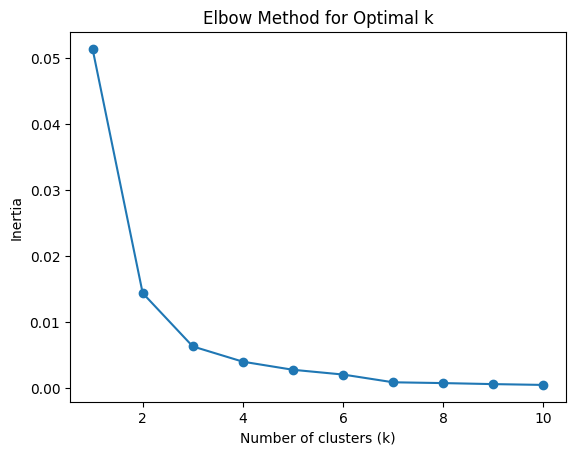


Cluster 0:
   department team  actual_productivity
8   finishing    6             0.713261
10  finishing    8             0.722659
14     sewing   11             0.723319
19     sewing    5             0.684739
21     sewing    7             0.735175
22     sewing    8             0.721205

Cluster 1:
   department team  actual_productivity
0   finishing    1             0.828435
1   finishing   10             0.806000
3   finishing   12             0.815432
4   finishing    2             0.817761
5   finishing    3             0.867645
6   finishing    4             0.818775
7   finishing    5             0.836556
12     sewing    1             0.844816
16     sewing    2             0.805900

Cluster 2:
   department team  actual_productivity
2   finishing   11             0.759565
9   finishing    7             0.750303
11  finishing    9             0.779256
13     sewing   10             0.765020
15     sewing   12             0.781255
17     sewing    3             0.788907
18  

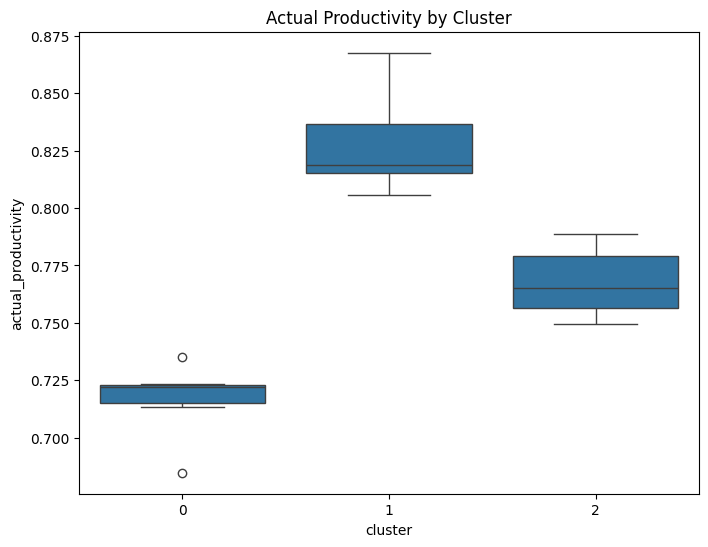

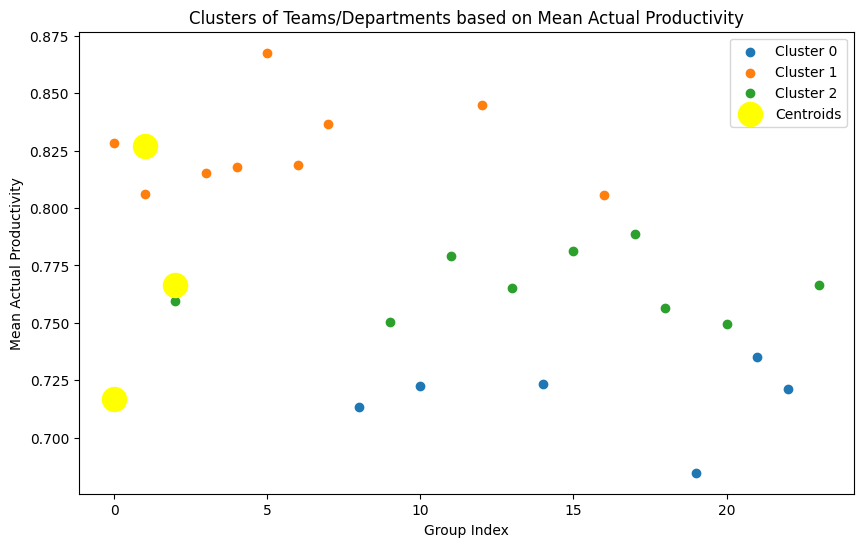

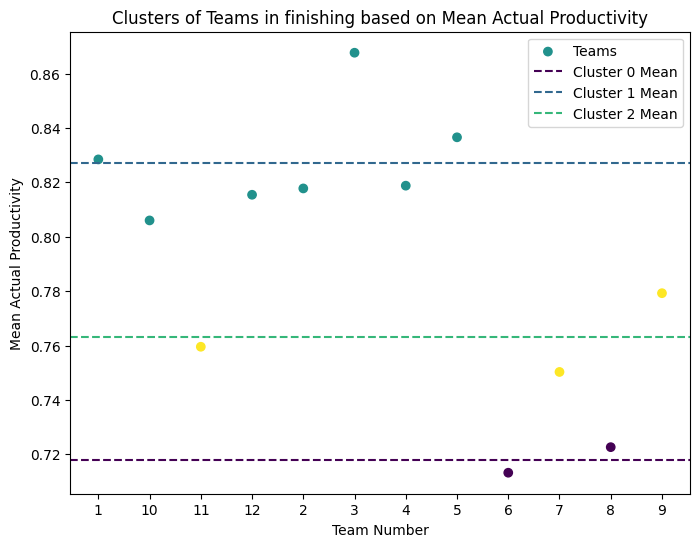

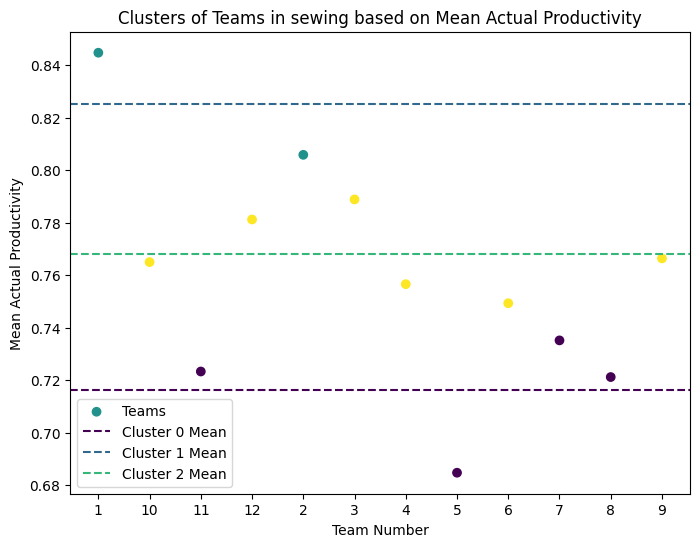

In [ ]:
# prompt: Cluster model to identify best actual producitivity based on the teams and department

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'garment_trainer' DataFrame is already loaded and preprocessed.
# Replace 'actual_productivity' with your actual productivity column if different.
# If 'garment_trainer' doesn't exist, replace with your DataFrame name

# Select relevant columns for clustering
X = garment_trainer[['department', 'team', 'actual_productivity']]

# Convert 'actual_productivity' to numeric if it's not already
X['actual_productivity'] = pd.to_numeric(X['actual_productivity'], errors='coerce')
X.dropna(inplace=True)

# Group by department and team, then calculate the mean actual productivity
productivity_by_group = X.groupby(['department', 'team'])['actual_productivity'].mean().reset_index()

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(productivity_by_group[['actual_productivity']])
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.show()


# Based on the Silhouette method plot, choose an appropriate k value
k = 3 # Example, you might need to change based on the plot


# Apply K-means clustering to the mean productivity values
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(productivity_by_group[['actual_productivity']])

# Add cluster labels to the grouped data
productivity_by_group['cluster'] = clusters

# Print the clusters with their corresponding departments and teams
for cluster_label in range(k):
    print(f"\nCluster {cluster_label}:")
    cluster_data = productivity_by_group[productivity_by_group['cluster'] == cluster_label]
    print(cluster_data[['department', 'team', 'actual_productivity']])


# Visualizations

# Boxplots of Actual Productivity by Cluster
plt.figure(figsize=(8, 6))
sns.boxplot(x='cluster', y='actual_productivity', data=productivity_by_group)
plt.title('Actual Productivity by Cluster')
plt.show()


# Scatter plot with Cluster Centroids
plt.figure(figsize=(10, 6))

for cluster_label in range(k):
    cluster_data = productivity_by_group[productivity_by_group['cluster'] == cluster_label]
    plt.scatter(cluster_data.index, cluster_data['actual_productivity'], label=f'Cluster {cluster_label}')

centroids = kmeans.cluster_centers_
plt.scatter(range(len(centroids)), centroids[:, 0], s=300, c='yellow', label='Centroids')

plt.title('Clusters of Teams/Departments based on Mean Actual Productivity')
plt.xlabel('Group Index')
plt.ylabel('Mean Actual Productivity')
plt.legend()
plt.show()


for department in productivity_by_group['department'].unique():
    plt.figure(figsize=(8, 6))
    department_data = productivity_by_group[productivity_by_group['department'] == department]
    plt.scatter(department_data['team'], department_data['actual_productivity'],
                c=department_data['cluster'], cmap='viridis', label='Teams')
    for cluster_label in range(k):
        cluster_mean = department_data[department_data['cluster'] == cluster_label]['actual_productivity'].mean()
        plt.axhline(cluster_mean, color=plt.cm.viridis(cluster_label / k), linestyle='--',
                    label=f'Cluster {cluster_label} Mean')
    plt.title(f'Clusters of Teams in {department} based on Mean Actual Productivity')
    plt.xlabel('Team Number')
    plt.ylabel('Mean Actual Productivity')
    plt.legend()
    plt.xticks(department_data['team'])
    plt.show()

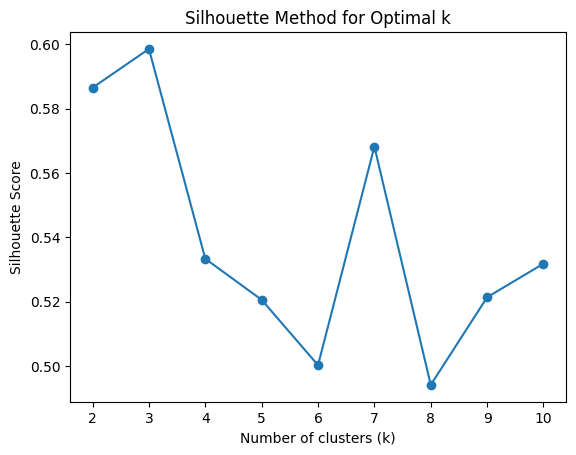

In [ ]:
# prompt: incorporate Silhouette Method to the above code

from google.colab import drive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import spearmanr
import scipy as sp
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import shap

# ... (Your existing code) ...


# Assuming 'garment_trainer' DataFrame is already loaded and preprocessed.
# Replace 'actual_productivity' with your actual productivity column if different.
# If 'garment_trainer' doesn't exist, replace with your DataFrame name

# Select relevant columns for clustering
X = garment_trainer[['department', 'team', 'actual_productivity']]

# Convert 'actual_productivity' to numeric if it's not already
X['actual_productivity'] = pd.to_numeric(X['actual_productivity'], errors='coerce')
X.dropna(inplace=True)

# Group by department and team, then calculate the mean actual productivity
productivity_by_group = X.groupby(['department', 'team'])['actual_productivity'].mean().reset_index()

# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):  # Test k from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(productivity_by_group[['actual_productivity']])
    silhouette_avg = silhouette_score(productivity_by_group[['actual_productivity']], cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

# Based on the Silhouette method plot, choose an appropriate k value
k = 3  # Example, you might need to change based on the plot

# Apply K-means clustering to the mean productivity values
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(productivity_by_group[['actual_productivity']])

# Add cluster labels to the grouped data
productivity_by_group['cluster'] = clusters

# ... (Rest of your existing code for printing clusters, visualizations, etc.) ...